**Supervised Learning - Foundations: ReCell**

**Context**


Buying and selling used phones and tablets used to be something that happened on a handful of online marketplace sites. But the used and refurbished device market has grown considerably over the past decade, and a new IDC (International Data Corporation) forecast predicts that the used phone market would be worth $52.7bn by 2023 with a compound annual growth rate (CAGR) of 13.6% from 2018 to 2023. This growth can be attributed to an uptick in demand for used phones and tablets that offer considerable savings compared with new models.

Refurbished and used devices continue to provide cost-effective alternatives to both consumers and businesses that are looking to save money when purchasing one. There are plenty of other benefits associated with the used device market. Used and refurbished devices can be sold with warranties and can also be insured with proof of purchase. Third-party vendors/platforms, such as Verizon, Amazon, etc., provide attractive offers to customers for refurbished devices. Maximizing the longevity of devices through second-hand trade also reduces their environmental impact and helps in recycling and reducing waste. The impact of the COVID-19 outbreak may further boost this segment as consumers cut back on discretionary spending and buy phones and tablets only for immediate needs.

**Objective**


The rising potential of this comparatively under-the-radar market fuels the need for an ML-based solution to develop a dynamic pricing strategy for used and refurbished devices. ReCell, a startup aiming to tap the potential in this market, has hired you as a data scientist. They want you to analyze the data provided and build a linear regression model to predict the price of a used phone/tablet and identify factors that significantly influence it.

**Data Description**

The data contains the different attributes of used/refurbished phones and tablets. The detailed data dictionary is given below.

* brand_name: Name of manufacturing brand 
* os: OS on which the device runs 
* screen_size: Size of the screen in cm
* 4g: Whether 4G is available or not 
* 5g: Whether 5G is available or not 
* main_camera_mp: Resolution of the rear camera in megapixels 
* selfie_camera_mp: Resolution of the front camera in megapixels 
* int_memory: Amount of internal memory (ROM) in GB 
* ram: Amount of RAM in GB 
* battery: Energy capacity of the device battery in mAh 
* weight: Weight of the device in grams 
* release_year: Year when the device model was released 
* days_used: Number of days the used/refurbished device has been used 
* new_price: Price of a new device of the same model in euros 
* used_price: Price of the used/refurbished device in euros


**Importing necessary libraries**

In [2]:
# Libraries to help with reading and manipulating data
#%load_ext nb_black

import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

# split the data into train and test
from sklearn.model_selection import train_test_split

# to build linear regression_model
from sklearn.linear_model import LinearRegression

# to check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# to build linear regression_model using statsmodels
import statsmodels.api as sm

# to compute VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

import warnings

warnings.filterwarnings("ignore")

## Loading data

In [3]:
# loading data
#data = pd.read_csv("used_device_data.csv")
from google.colab import files
import io

uploaded = files.upload()


Saving used_device_data.csv to used_device_data.csv


In [4]:
import io 
# copying the dataset
data = pd.read_csv(io.BytesIO(uploaded['used_device_data.csv']))

## Data Overview

In [7]:
# Checking shape of the data
print(f"There are {data.shape[0]} rows and {data.shape[1]} columns.")

There are 3454 rows and 15 columns.


In [5]:
# creating a copy of data to avoid any changes to original data
df=data.copy()

In [9]:
# Checking columns and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3454 entries, 0 to 3453
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   brand_name        3454 non-null   object 
 1   os                3454 non-null   object 
 2   screen_size       3454 non-null   float64
 3   4g                3454 non-null   object 
 4   5g                3454 non-null   object 
 5   main_camera_mp    3275 non-null   float64
 6   selfie_camera_mp  3452 non-null   float64
 7   int_memory        3450 non-null   float64
 8   ram               3450 non-null   float64
 9   battery           3448 non-null   float64
 10  weight            3447 non-null   float64
 11  release_year      3454 non-null   int64  
 12  days_used         3454 non-null   int64  
 13  new_price         3454 non-null   float64
 14  used_price        3454 non-null   float64
dtypes: float64(9), int64(2), object(4)
memory usage: 404.9+ KB


### Observations

There 15 columns.
* 4 object types.
* 2 int types.
* 9 float types.

In [10]:
# Let's look at some sample data
df.sample(n=10, random_state=1)

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,new_price,used_price
866,Others,Android,15.24,no,no,8.00,2.0,16.0,4.00,3000.0,206.0,2014,632,179.61,56.76
957,Celkon,Android,10.16,no,no,3.15,0.3,512.0,0.25,1400.0,140.0,2013,637,48.65,16.45
280,Infinix,Android,15.39,yes,no,NaN,8.0,32.0,2.00,5000.0,185.0,2020,329,88.88,79.10
2150,Oppo,Android,12.83,yes,no,13.00,16.0,64.0,4.00,3200.0,148.0,2017,648,281.30,107.54
93,LG,Android,15.29,yes,no,13.00,5.0,32.0,3.00,3500.0,179.0,2019,216,200.42,91.62
1040,Gionee,Android,12.83,yes,no,13.00,8.0,32.0,4.00,3150.0,166.0,2016,970,279.87,104.13
3170,ZTE,Others,10.16,no,no,3.15,5.0,16.0,4.00,1400.0,125.0,2014,1007,69.71,43.14
2742,Sony,Android,12.70,yes,no,20.70,2.0,16.0,4.00,3000.0,170.0,2013,1060,330.24,83.33
102,Meizu,Android,15.29,yes,no,NaN,20.0,128.0,6.00,3600.0,165.0,2019,332,420.17,142.51
1195,HTC,Android,10.29,no,no,8.00,2.0,32.0,4.00,2000.0,146.0,2015,892,131.50,68.57


### Observations

From above sample of 10 rows we can see that,

* There are some NaN values indicating missing values.
* Android looks most frequent os.
* Few columns have wide range of values.
* columns 4g and 5g have yes,no values.

In [11]:
# Checking for missing values
df.isnull().any()

brand_name          False
os                  False
screen_size         False
4g                  False
5g                  False
main_camera_mp       True
selfie_camera_mp     True
int_memory           True
ram                  True
battery              True
weight               True
release_year        False
days_used           False
new_price           False
used_price          False
dtype: bool

In [12]:
# checking number of rows with at least 1 missing value
df.isna().any(axis=1).sum()

201

#### Observations

* There are 6 columns with missing values.
* There are 201 rows with at least 1 missing value.

In [14]:
# checking duplicate values in the data
df.duplicated().value_counts()

False    3454
dtype: int64

#### Observations:
There are no duplicate rows in data

## Exploratory Data Analysis (EDA)

### Statistical summary of the data

In [15]:
# summary of the numerical data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
screen_size,3454.0,13.713115,3.805280,5.08,12.7000,12.830,15.340,30.71
main_camera_mp,3275.0,9.460208,4.815461,0.08,5.0000,8.000,13.000,48.00
selfie_camera_mp,3452.0,6.554229,6.970372,0.00,2.0000,5.000,8.000,32.00
int_memory,3450.0,54.573099,84.972371,0.01,16.0000,32.000,64.000,1024.00
ram,3450.0,4.036122,1.365105,0.02,4.0000,4.000,4.000,12.00
battery,3448.0,3133.402697,1299.682844,500.00,2100.0000,3000.000,4000.000,9720.00
weight,3447.0,182.751871,88.413228,69.00,142.0000,160.000,185.000,855.00
release_year,3454.0,2015.965258,2.298455,2013.00,2014.0000,2015.500,2018.000,2020.00
days_used,3454.0,674.869716,248.580166,91.00,533.5000,690.500,868.750,1094.00
new_price,3454.0,237.038848,194.302782,18.20,120.3425,189.785,291.115,2560.20


#### Observations
* There are wide range of values for some columns.
* main_camera_mp has minimum value 0.08, maximum 48.
* selfie_camera mp has minimum value with 0, indicating few devices with no selfie camera.
* int_memory has minimum value 0.01,device with 100MB storage.
* battery varies from 500 mAh to 9720 mAh.
* data has devices released from 2013 to 2020
* data has devices that are used for 3 months to almost 3 years.
* price of the new device of the same model varies from 18.20 euros to 2560 euros.
* price of the used/refurbished device varies from 4.65 euros to 749 euros.
* some columns are very skewed.

In [16]:
# summary statistics of non numeric data
df.describe(include="object").T

,count,unique,top,freq
brand_name,3454,34,Others,502
os,3454,4,Android,3214
4g,3454,2,yes,2335
5g,3454,2,no,3302


#### Observations
* Android os is most frequent os.
* 4G service is most common than 5G service.
* Many devices' brand name is not mentioned exactly, they are under the others category.

### Univariate analysis

In [24]:
# function to plot a boxplot and a histogram along the same scale.
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [25]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="pastel",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage
    
    plt.show()  # show the plot

#### Brand names

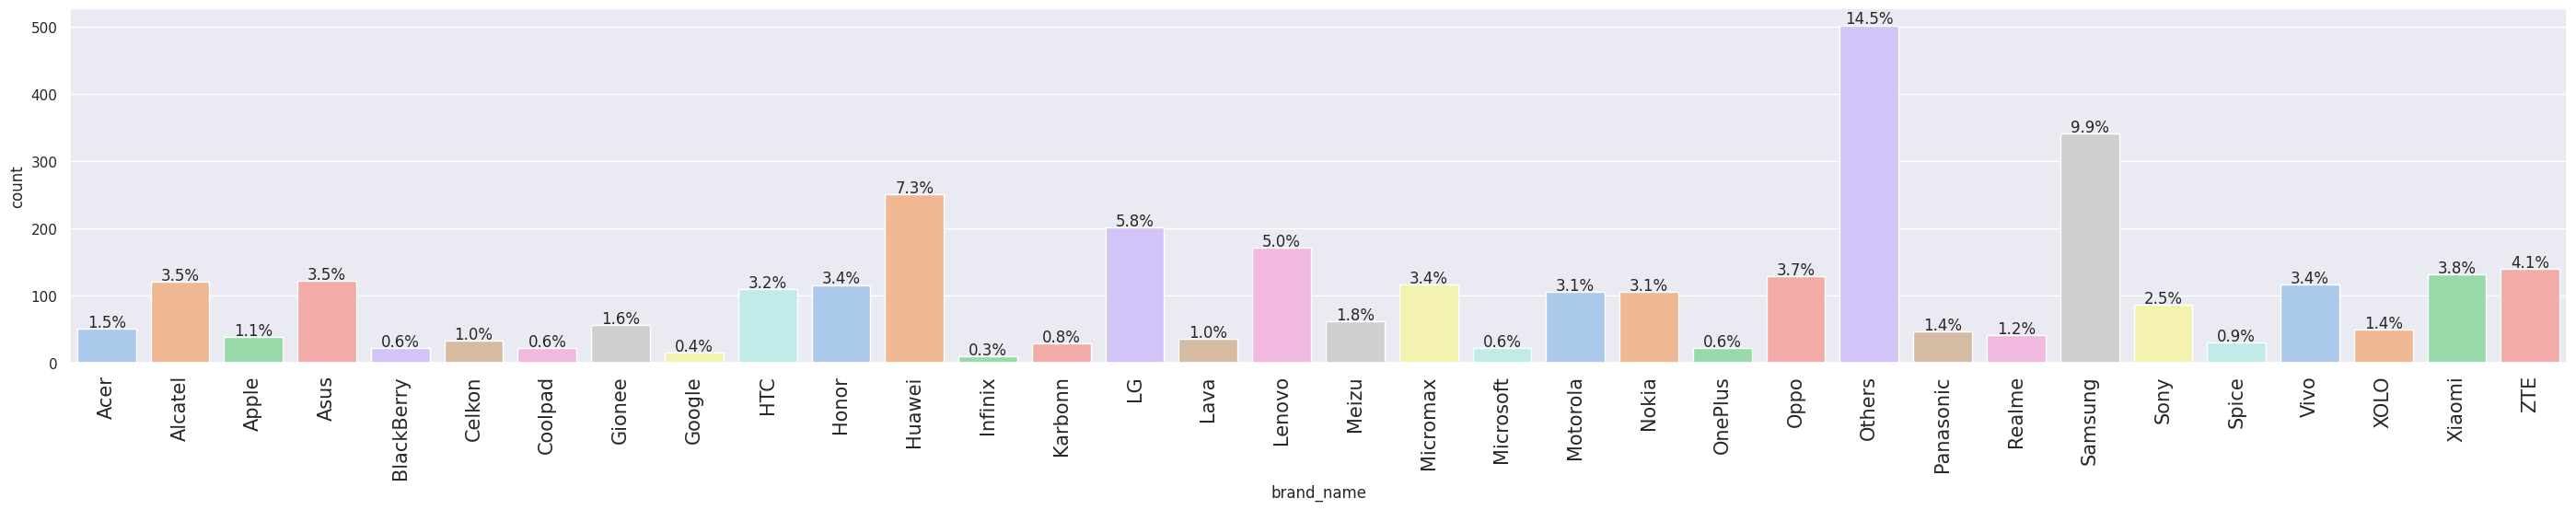

In [19]:
# let's look at the brand name
labeled_barplot(df, "brand_name", perc=True)

#### Observations
* 14.5% of the devices are others/unknown category
* Samsung is the brand with almost 10% of the devices.
* Huwaei is the second most popular brand with 7.3% of the devices.

#### Operating Systems

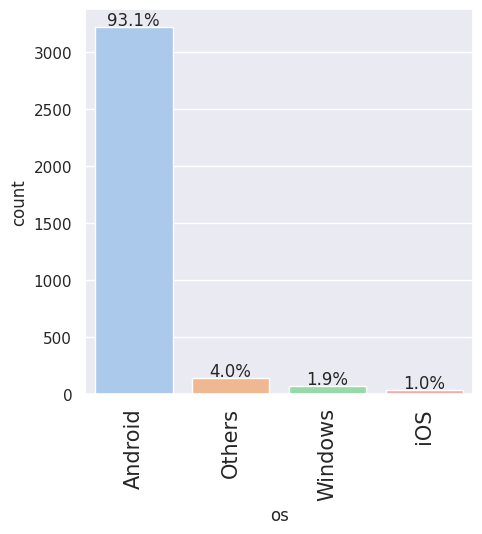

In [20]:
# lets look at os distribution
labeled_barplot(df, "os", perc=True)

#### Observation:
* 93% of the devices are of Android os!
* only 2% of windows,1% of iOS and 4% others.

#### Screen size

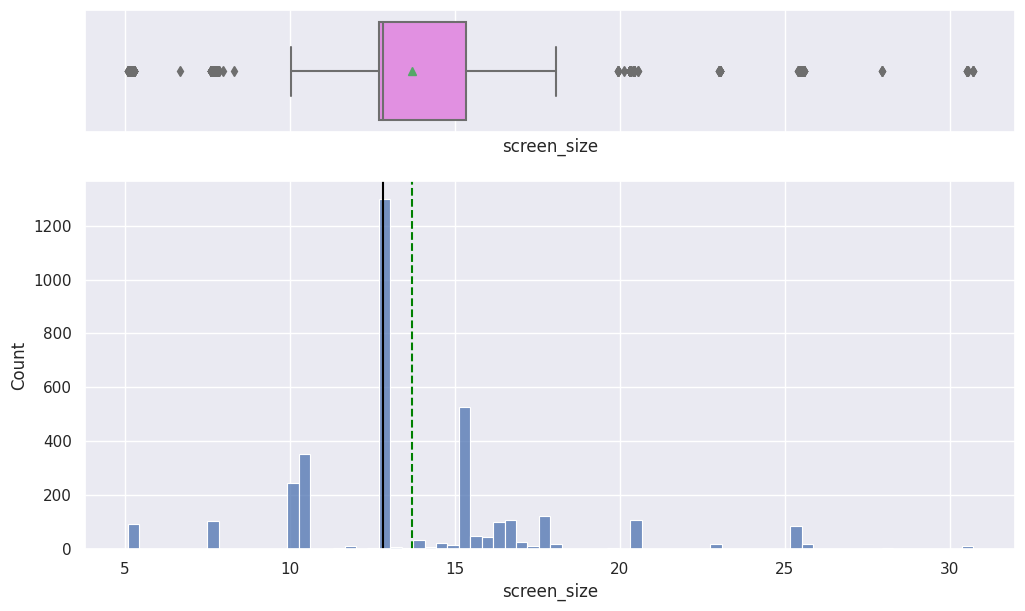

In [21]:
# lets look at screen size
histogram_boxplot(df, "screen_size")

#### Observations:
* Mean and median value for screen size looks almost same.
* it has outliers at both the ends.
* data looks right skewed.

#### 4G service and 5G service

<Figure size 1500x400 with 0 Axes>

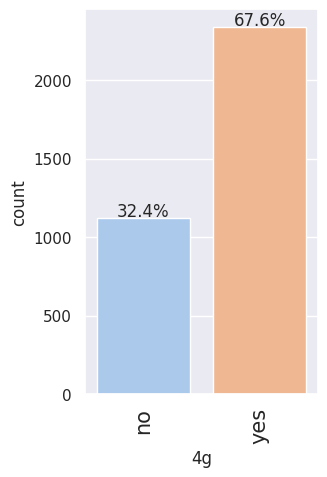

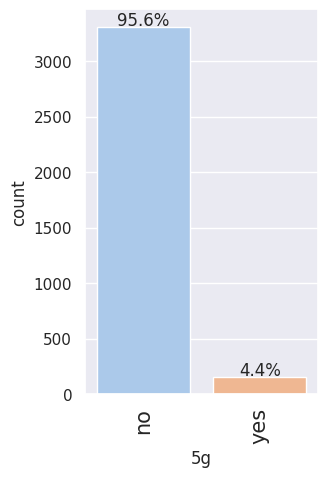

In [22]:
# let's compare 4G and 5G services
plt.figure(figsize=(15, 4))
labeled_barplot(df, "4g", perc=True)
labeled_barplot(df, "5g", perc=True)

#### Observations:
* 67% devices provide only 4G service,only 4.4% devices provide 5G services.
* It is obvious that devices that provide 5G services by default provide 4G also.
* Some devices do not provide 4G and 5G services at all.

#### main camera mp

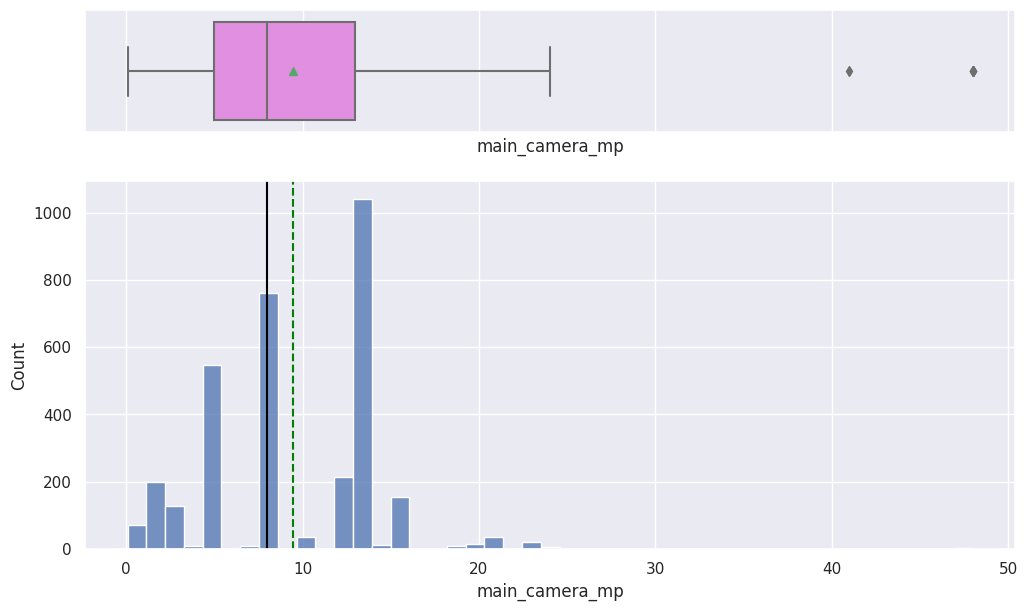

In [23]:
# histogram boxplot for main camera mp
histogram_boxplot(df, "main_camera_mp")

#### Observation:
* data looks right skewed.
* There are outliers in data,indicating some devices have very large mp main camera.

#### Selfie camera mp

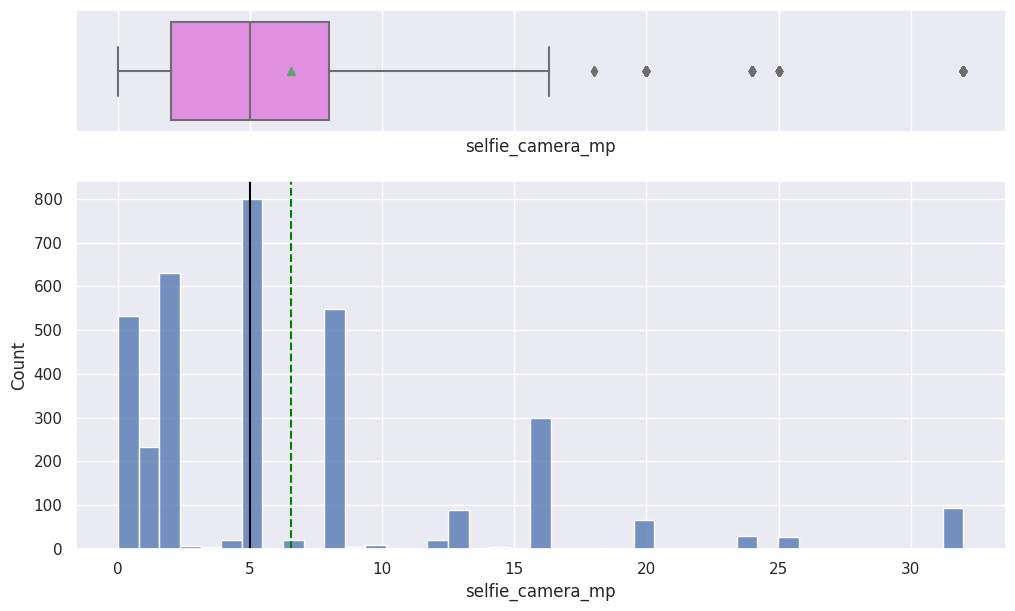

In [24]:
# histogram boxplot for and selfie camera mp
histogram_boxplot(df, "selfie_camera_mp")

#### Observations:
* The data looks right skewed.
* The presence of outliers indicate some devices provide very good selfie camera than most of the devices.

#### int memory

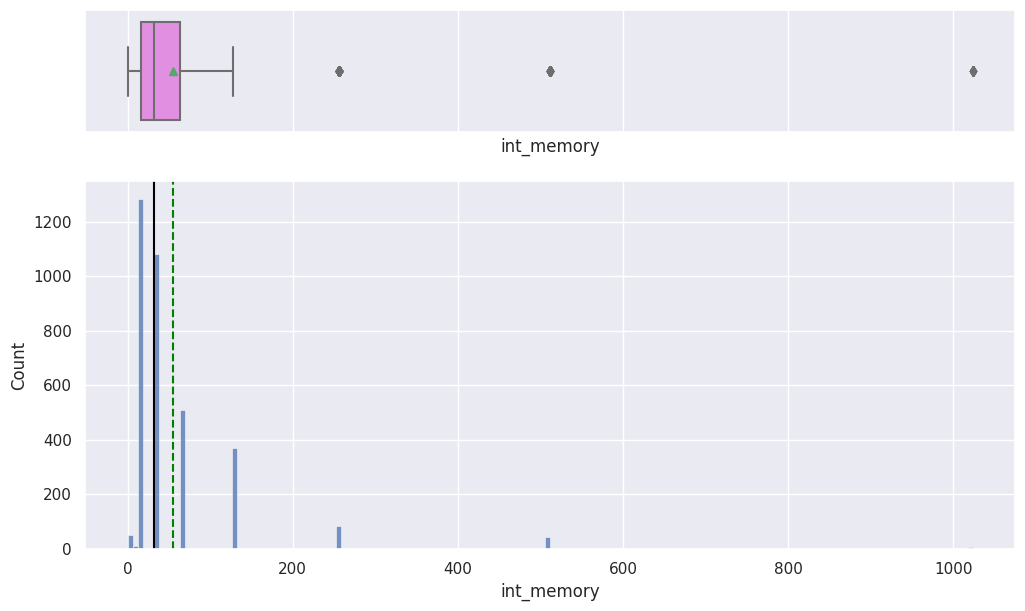

In [25]:
# histogram boxplot for internal memory
histogram_boxplot(df, "int_memory")


#### Observations:
* mean ROM is 54 GB. median is 32.
* Outliers indicate some devices have very large ROM .

#### RAM

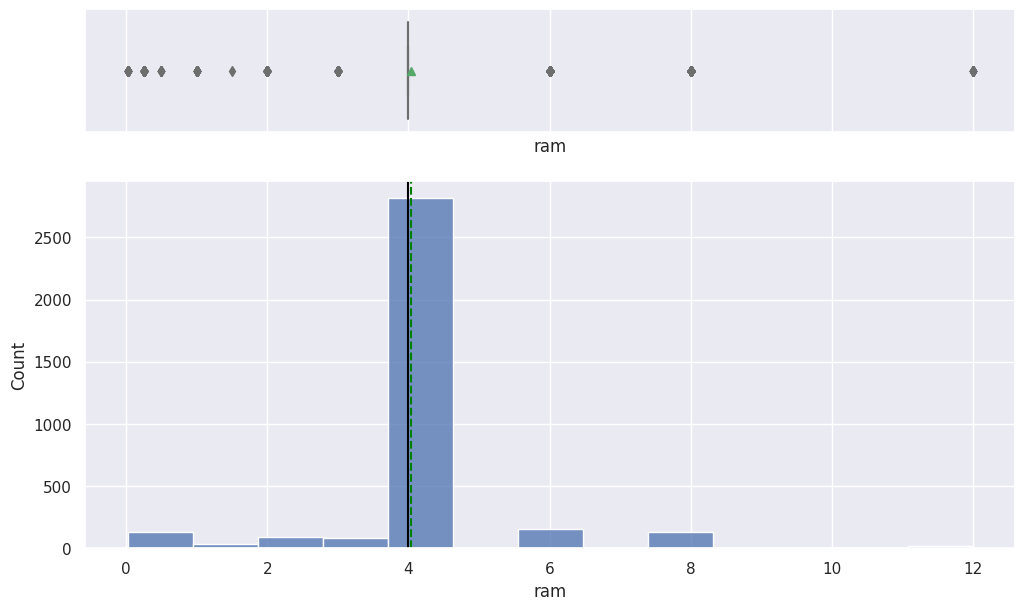

In [26]:
# histogram boxplot for ram
histogram_boxplot(df, "ram")

#### Observations:
* Mean and median are same.
* Most of the data are centered around mean. Most of the devices provide 4GB RAM
* Outliers are present on both ends.

#### Battery

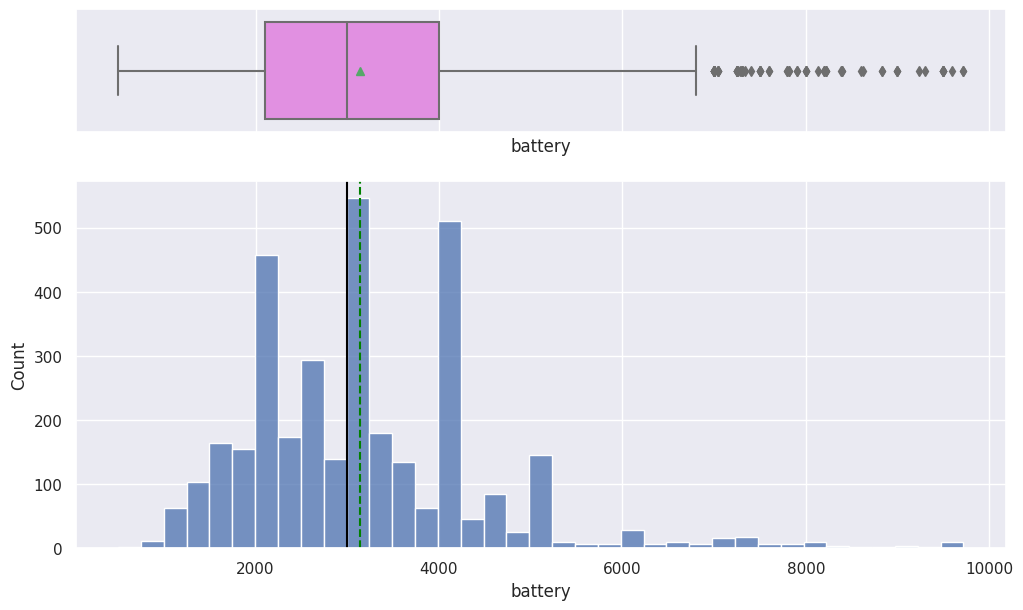

In [27]:
# histogram boxplot for battery
histogram_boxplot(df, "battery")

#### Observations:
* Mean and median looks almost same.
* Large outliers towards right indicating many devices with very large energy capacity

#### Weight

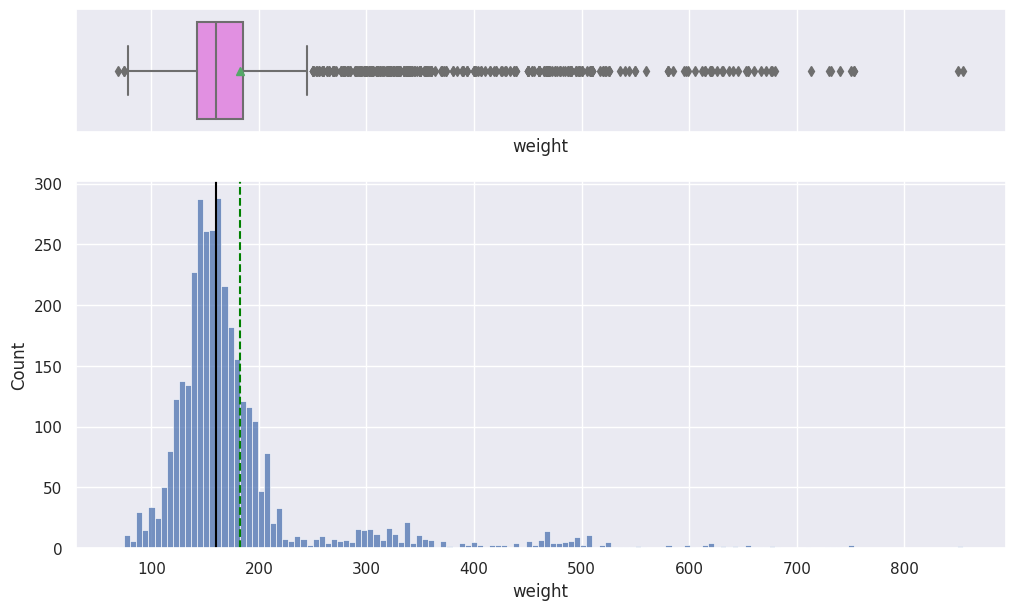

In [28]:
# histogram boxplot for weight of the device
histogram_boxplot(df, "weight")

#### Observations:
* Data looks right skewed with large outliers.
* As the data has both phone and tablets,it looks like some tablets are very heavy compared to phones.

#### Release year

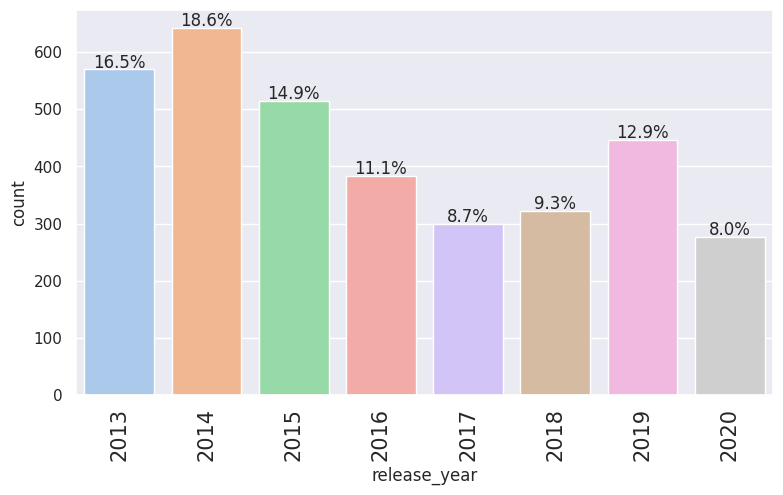

In [29]:
# labeled barplot for release year
labeled_barplot(df, "release_year", perc=True)

#### Observations:
* Our data has devices released from the year 2013 to 2020.
* 18.6% of devices are from 2014, 8% of the devices are from 2020.

#### Days used

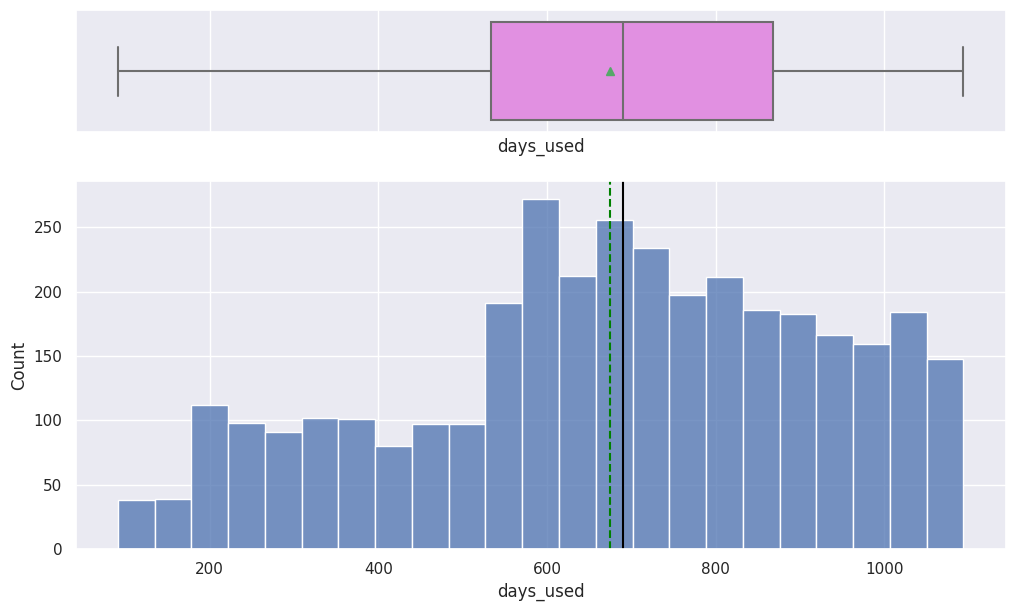

In [30]:
# histogram boxplot for number of days the device used for
histogram_boxplot(df, "days_used")

#### Observations:
* Mean and median are almost same.
* Some devices are used less than 100 days.
* Some devices are used for almost 3 years.

#### New price

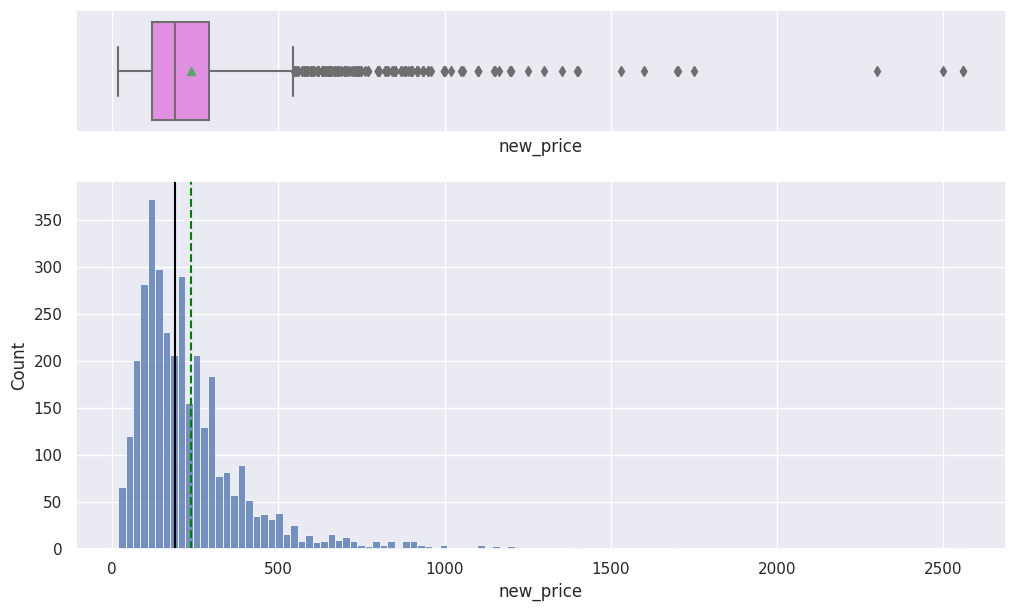

In [31]:
# histogram boxplot for new device
histogram_boxplot(df, "new_price")

#### Observations:
* 50% of the devices cost around 189 euros
* There are outliers. Some devices cost more than 2000 euros. SO the data looks skewed to the right.

### From the above new price distribution we can see that there are wide range of devices. Let us group them into budget, mid-range and premium devices for further processing.

## Data preprocessing

### Feature Engineering

In [32]:
# Let's create a new column `device_category` from the `new_price` column to tag devices as budget, mid-range, or premium.
df["device_category"] = pd.cut(
    x=df.new_price,
    bins=[-np.infty, 200, 350, np.infty],
    labels=["Budget", "Mid-range", "Premium"],
)

df["device_category"].value_counts()

Budget       1844
Mid-range    1025
Premium       585
Name: device_category, dtype: int64

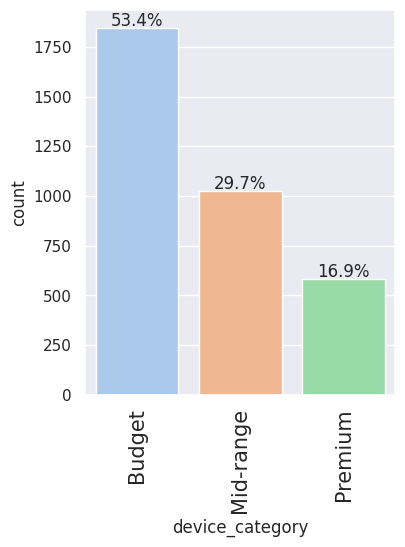

In [37]:
# labeled barplot for device category
labeled_barplot(df, "device_category", perc=True)

#### Observation:
* There are 1844 devices below 200 euros.
* 1025 devices from 200 euros to 350 euros.
* 585 devices above 350 euros.

#### Used price

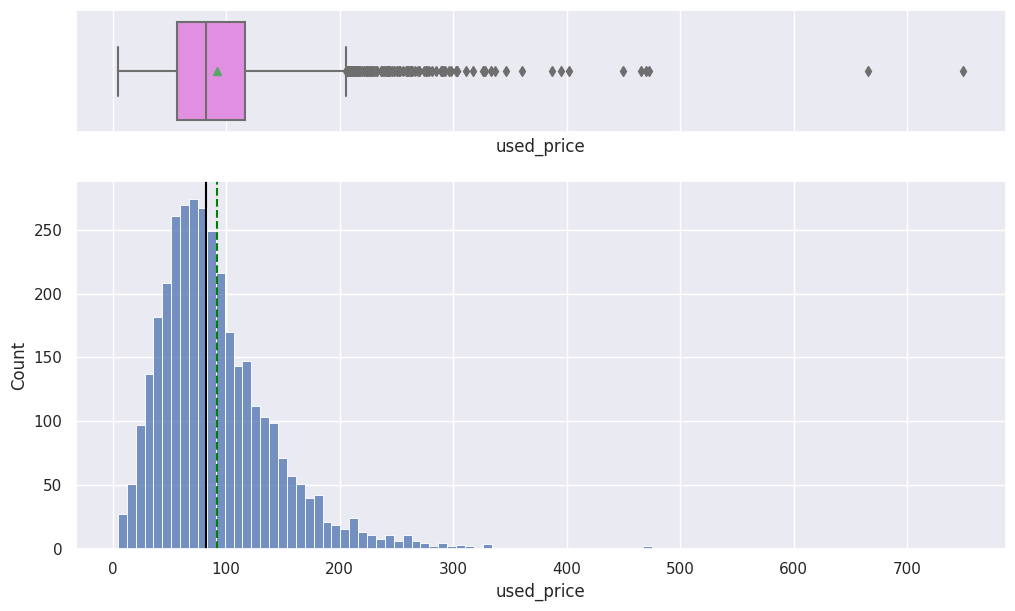

In [34]:
# histogram boxplot for used device
histogram_boxplot(df, "used_price")

#### Observations:
* The data looks almost normally distributed with slight right skew.
* Median price is 81 euros, mean price is 92 euros.
* Data has devices ranging from 4.6 euros to 750 euros.
* Outliers to the right indicates there are lots of devices with more than normal prices.

### Bivariate analysis
Let us look at the correlation between columns before data preprocessing

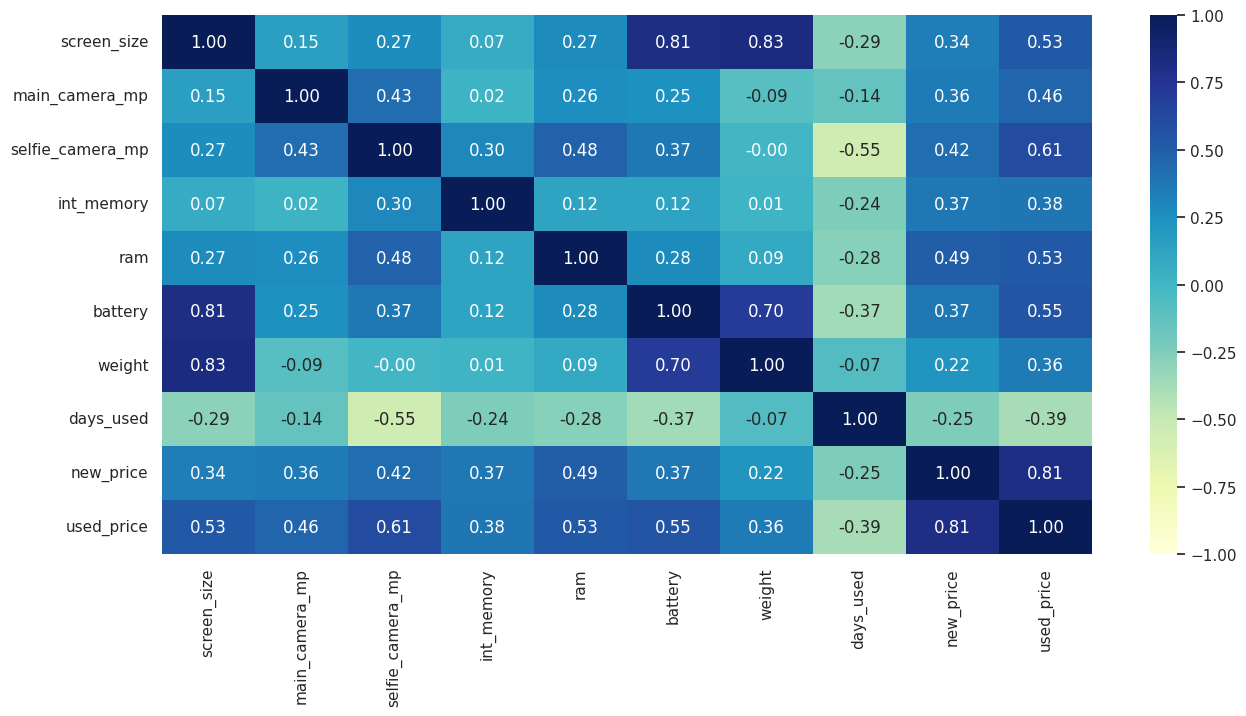

In [35]:
num_cols_list = df.select_dtypes(include=np.number).columns.tolist()
# dropping release_year as it is a temporal variable
num_cols_list.remove("release_year")

plt.figure(figsize=(15, 7))
sns.heatmap(
    df[num_cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="YlGnBu"
)
plt.show()


#### observations:
* From the above heatmap used price is highly positively correlated to used_price.
* used price is moderately correlated to selfie_camera_mp.
* used_price is positively correlated to ram and battery.
* screen_size,battery and weight of the device have high positive correlation.
* selfie_camera mp and days_used have modearte negetive correlation.

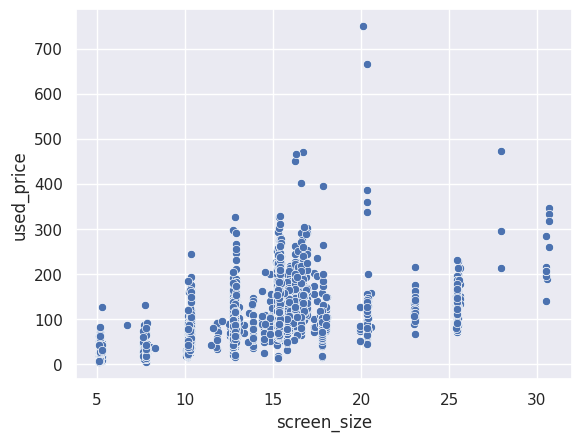

In [14]:
sns.scatterplot(x=df["screen_size"], y=df["used_price"])
plt.show()


#### Observations:
* used price is low for small screen sizes.
* When screen size is around 20 price is highest.
* When screen size is highest,price is in the middle range.
* Most of the devices have screen in the range 10-20 c.m.

#### used_price v/s selfie_camera_mp

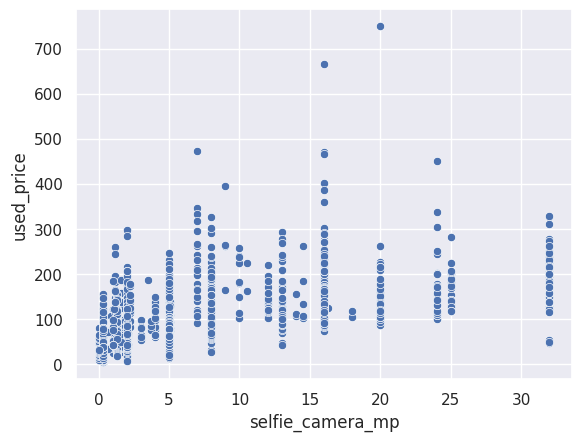

In [16]:
sns.scatterplot(x=df["selfie_camera_mp"],y=df["used_price"])
plt.show()

#### Observations:
* Many devices with very low or zero mp for selfie camera are priced low.
* highest priced device has selfie camera mp around 20.
* Devices with high mp selfie camera prices are in the range 50 to 350


#### used_price v/s ram

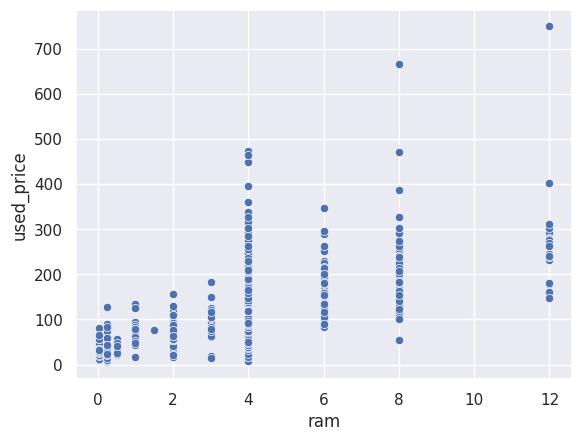

In [17]:
sns.scatterplot(x=df["ram"],y=df["used_price"])
plt.show()

#### Observations:
* It looks RAM has values ranging from few megabytes to 12 GB.
* There are many devices in 4GB RAM.
* 12 GB RAM device has higest used_price.

used_price v/s battery


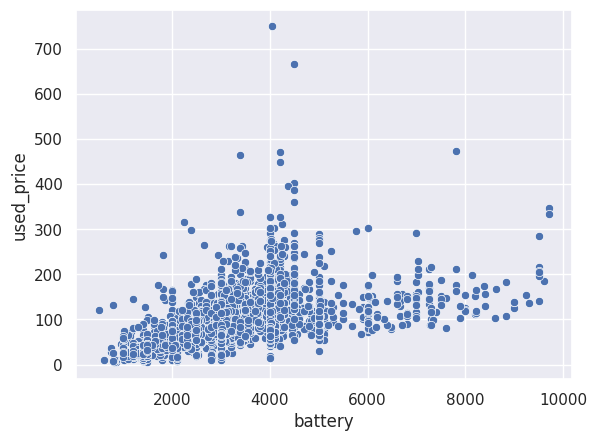

In [19]:
sns.scatterplot(x=df["battery"],y=df["used_price"])
plt.show()

#### Observations:
* Devices with less than 2000 mAh are mostly cost around 100-200 euros.
* Devices with highest battery capacity cost less than 400 euros.
* The devices that cost most have battery around 4000 mAh


#### used_price v/s new_price

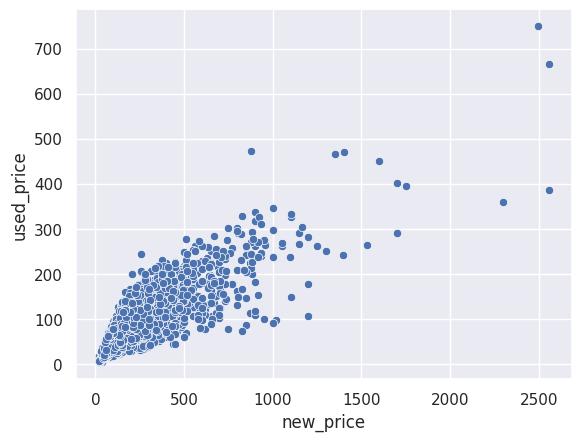

In [22]:
sns.scatterplot(x=df["new_price"],y=df["used_price"])
plt.show()

#### Observations:
* used price looks linearly related to new price for most of the data.

#### Let us look at the distribution of used device prices look like.

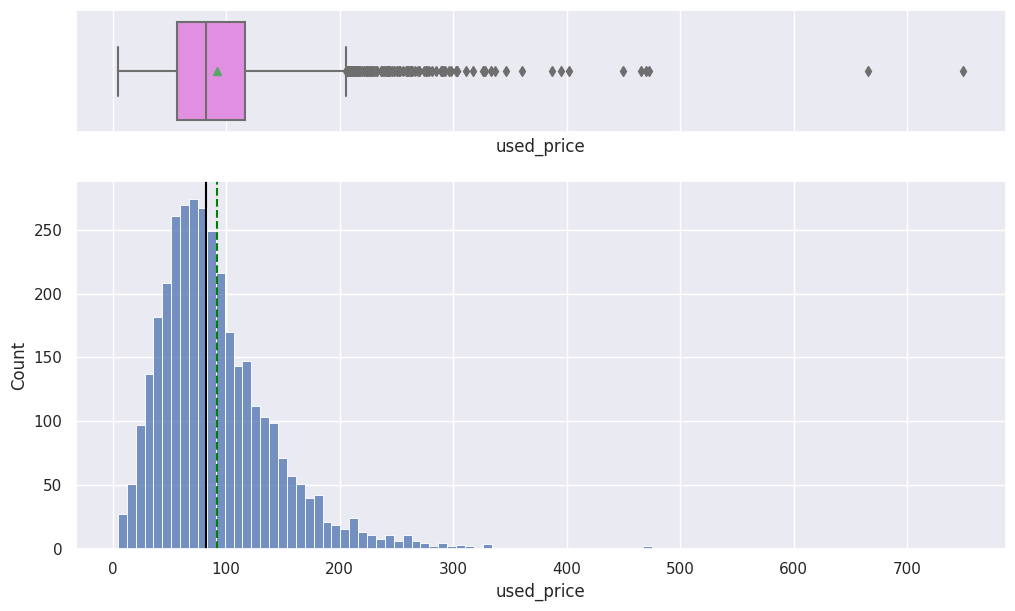

In [26]:
# histogram boxplot for used device
histogram_boxplot(df, "used_price")

#### Observations:
* The data looks almost normally distributed with slight right skew.
* Median price is 81 euros, mean price is 92 euros.
* Data has devices ranging from 4.6 euros to 750 euros.
* Outliers to the right indicates there are lots of devices with more than normal prices.

#### Android is the most popular os. Let us look at what percentage of used device market is dominated by Android devices.

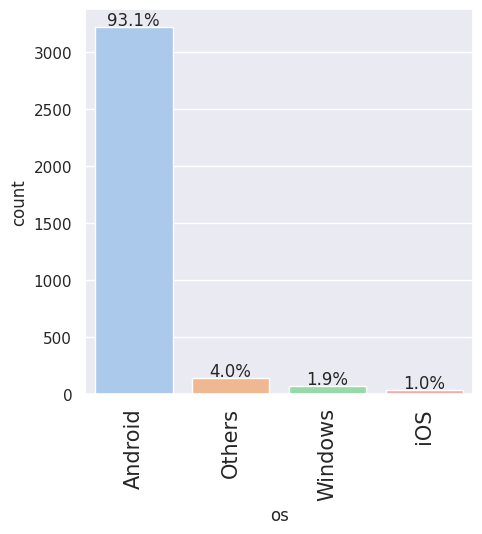

In [27]:
# labeled barplot for os.
labeled_barplot(df, "os", perc=True)

#### Observation:
* 91% of the used device market is dominated by Android devices

#### The amount of RAM is important for the smooth functioning of a device. Let us see how the amount of RAM vary with the brand.

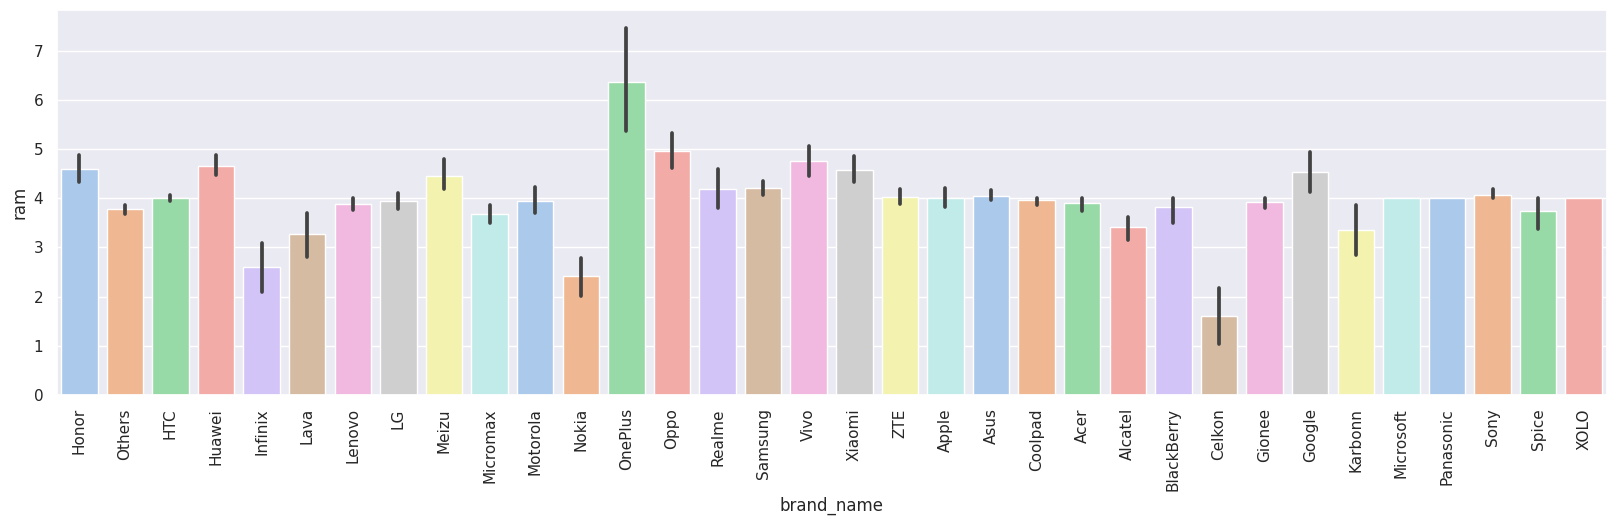

In [28]:
plt.figure(figsize=(20, 5))
sns.barplot(data=df, x="brand_name", y="ram", palette="pastel")
plt.xticks(rotation=90)
plt.show()


#### Observations:
* OnePlus has highest mean RAM
* Celkon has lowest mean RAM
* Most of the brands have mean RAM about 4 GB

#### People who travel frequently require devices with large batteries. A large battery often increases a device's weight, making it feel uncomfortable in the hands. Let us see how the weight vary for phones and tablets offering large batteries (more than 4500 mAh)

In [42]:
# dataframe for devices with battery capacity more than 4500 mAh
df_large_battery = df[df["battery"] > 4500]
print(
    f"There are {df_large_battery.shape[0]} devices with battery capacity more than 4500 mAh"
)
df_large_battery.groupby("brand_name")["weight"].mean().sort_values(ascending=True)

There are 341 devices with battery capacity more than 4500 mAh


brand_name
Micromax     118.000000
Spice        158.000000
Panasonic    182.000000
Infinix      193.000000
Oppo         195.000000
ZTE          195.400000
Vivo         195.630769
Realme       196.833333
Motorola     200.757143
Gionee       209.430000
Xiaomi       231.500000
Honor        248.714286
Asus         313.772727
Nokia        318.000000
Acer         360.000000
LG           366.058333
Alcatel      380.000000
Others       390.546341
Huawei       394.486486
Samsung      398.352000
HTC          425.000000
Sony         439.500000
Apple        439.558824
Lenovo       442.721429
Google       517.000000
Name: weight, dtype: float64

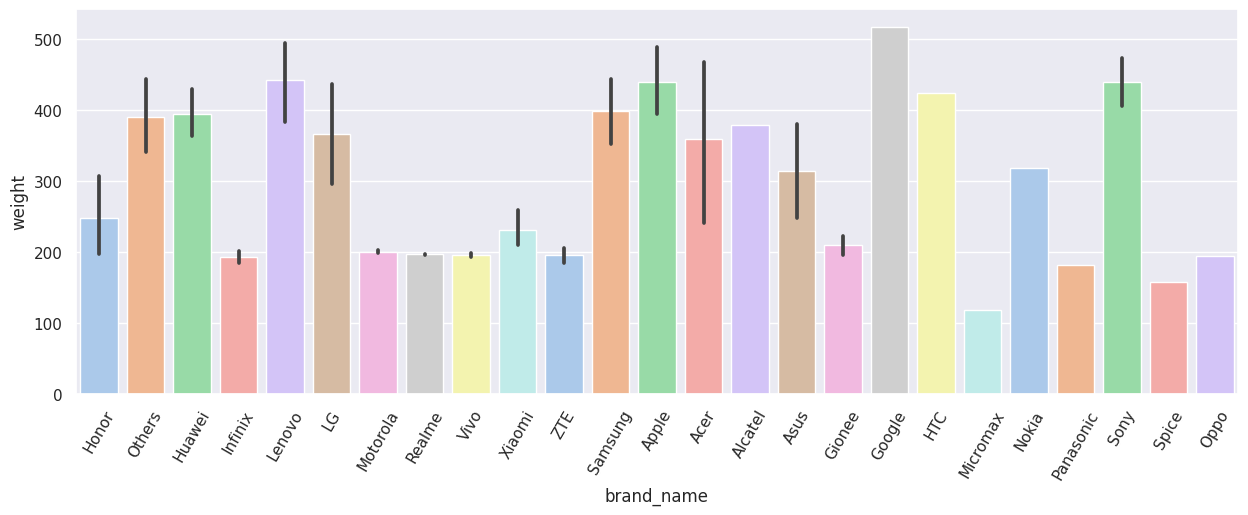

In [30]:
# labeled barplot for devices with large battery(more than 4500 mAh) accross brands
plt.figure(figsize=(15, 5))
sns.barplot(data=df_large_battery, x="brand_name", y="weight", palette="pastel")
plt.xticks(rotation=60)
plt.show()

#### Observations:
* There are 341 devices with large battery
* Out of these 341 devices mean weight of Micromax devices are less.
* Mean weight of Google devices are heavier.

#### People who travel may need 4G or 5G services along with large battery. Let us look at devices with large battery and 4Gor 5G services available across categories.

In [43]:
df_battery_4G_5G = df_large_battery[
    (df_large_battery["4g"] == "yes") | (df_large_battery["5g"] == "yes")
]


In [44]:
df_battery_4G_5G["device_category"].value_counts()

Mid-range    107
Budget        92
Premium       76
Name: device_category, dtype: int64

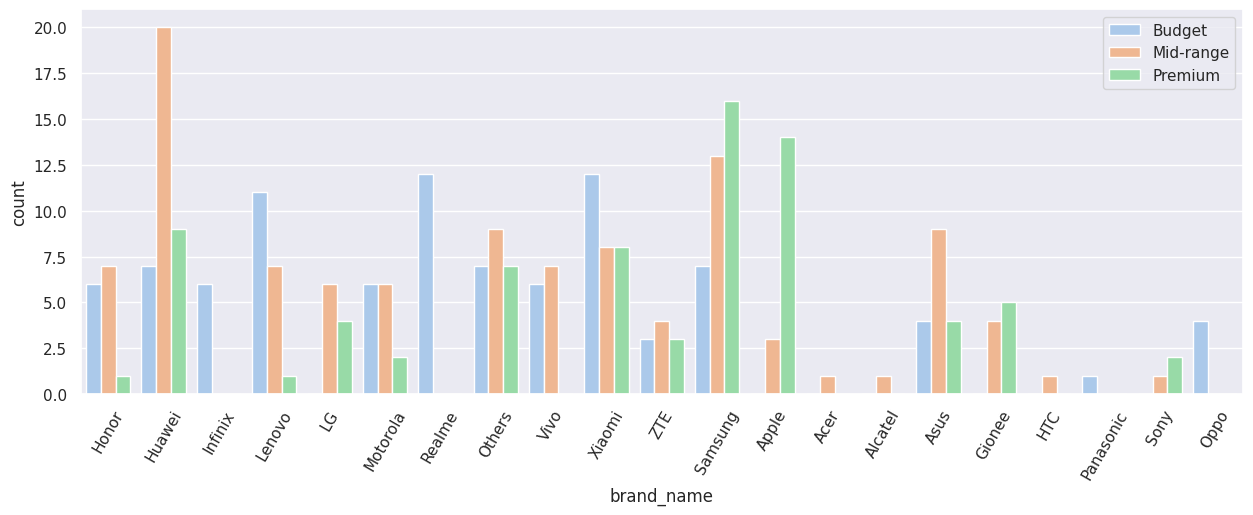

In [45]:
plt.figure(figsize=(15, 5))
sns.countplot(
    data=df_battery_4G_5G, x="brand_name", hue="device_category", palette="pastel"
)
plt.xticks(rotation=60)
plt.legend(loc=1)
plt.show()

#### Observations:
* There are 275 devices with large battery and 4G or 5G services.
* Out of those 275 devices, mid range and budget devices are more likely to provide the above service.

#### Bigger screens are desirable for entertainment purposes as they offer a better viewing experience. How many phones and tablets are available across different brands with a screen size larger than 6 inches?

In [46]:
# dataframe of only those devices with screen size more than 6 inches.
df_large_screen = df[df["screen_size"] > 6 * 2.54]
print(f"There are {df_large_screen.shape[0]} devices with screen larger than 6 inches")

There are 1099 devices with screen larger than 6 inches


In [47]:
# diffrent brand providing large screen devices
df_large_screen.brand_name.value_counts()

Huawei       149
Samsung      119
Others        99
Vivo          80
Honor         72
Oppo          70
Xiaomi        69
Lenovo        69
LG            59
Motorola      42
Asus          41
Realme        40
Alcatel       26
Apple         24
Acer          19
ZTE           17
Meizu         17
OnePlus       16
Nokia         15
Sony          12
Infinix       10
HTC            7
Micromax       7
Google         4
Coolpad        3
Gionee         3
XOLO           3
Karbonn        2
Panasonic      2
Spice          2
Microsoft      1
Name: brand_name, dtype: int64

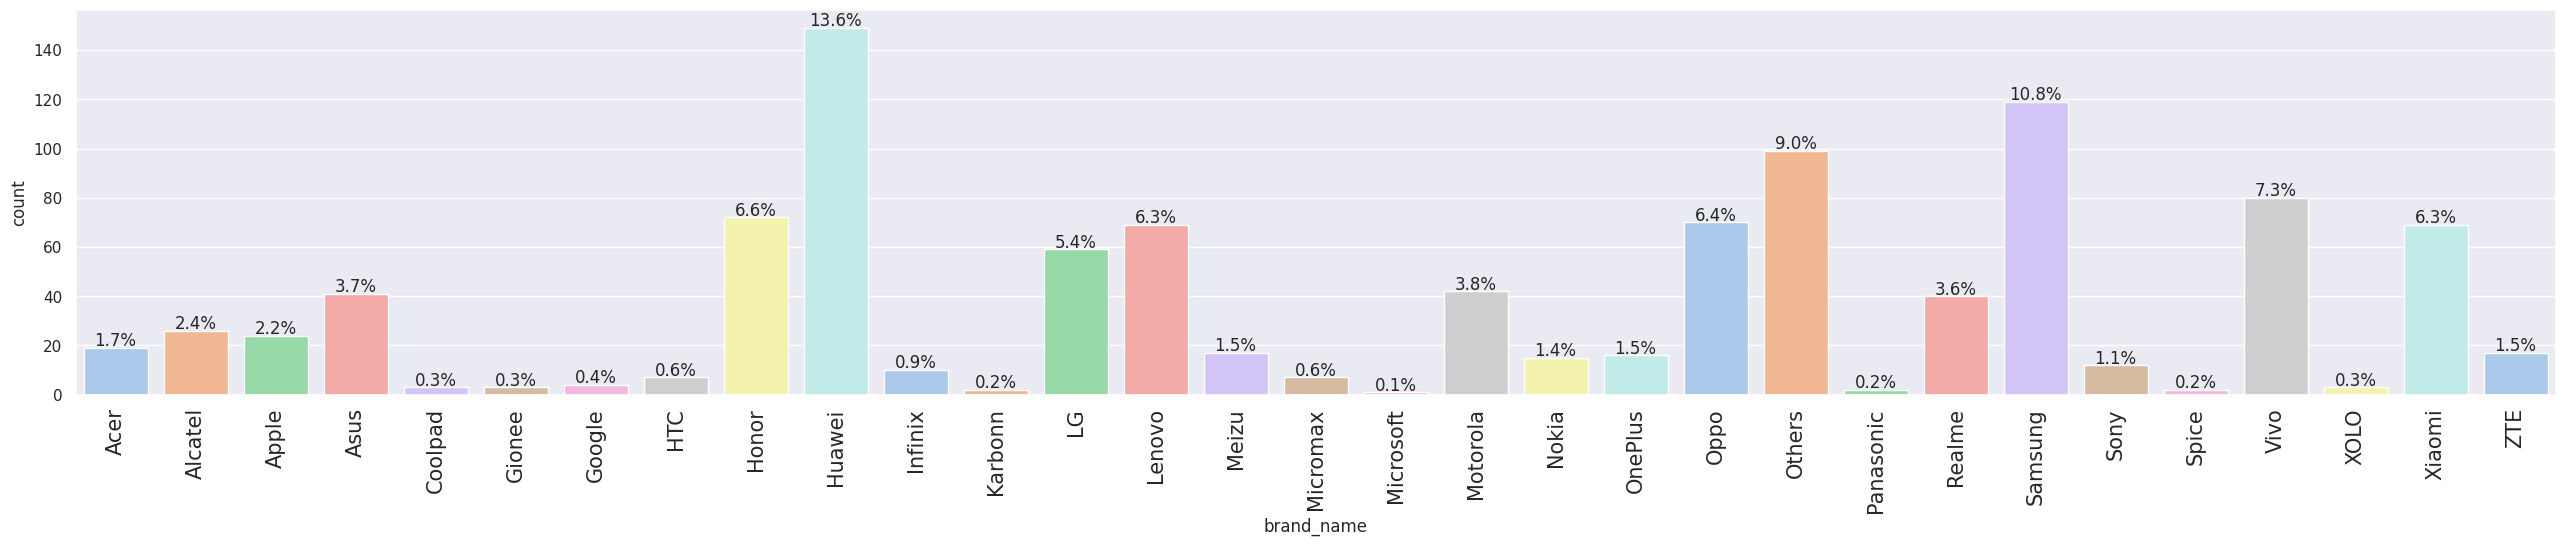

In [48]:
# labeled barplot for devices with screen more than 6 inches accross brands
labeled_barplot(df_large_screen, "brand_name", perc=True)

#### Observations:
* There are 1099 devices with screen larger than 6 inches.
* Huawei has 149 most of the large screen devices.
* Microsoft is has only one device with large screen.

#### Budget devices nowadays offer great selfie cameras, allowing us to capture our favorite moments with loved ones. Let us look at the distribution of budget devices offering greater than 8MP selfie cameras across brands.

In [49]:
# creating dataframe for devices with selfie camera greater than 8MP
df_selfie = df[df["selfie_camera_mp"] > 8]
print(f" There are {df_selfie.shape[0]} devices with more than 8MP selfie cameras")

 There are 655 devices with more than 8MP selfie cameras


In [50]:
# Selfie cameras greater than 8Mps in different category
df_selfie["device_category"].value_counts()

Premium      267
Mid-range    262
Budget       126
Name: device_category, dtype: int64

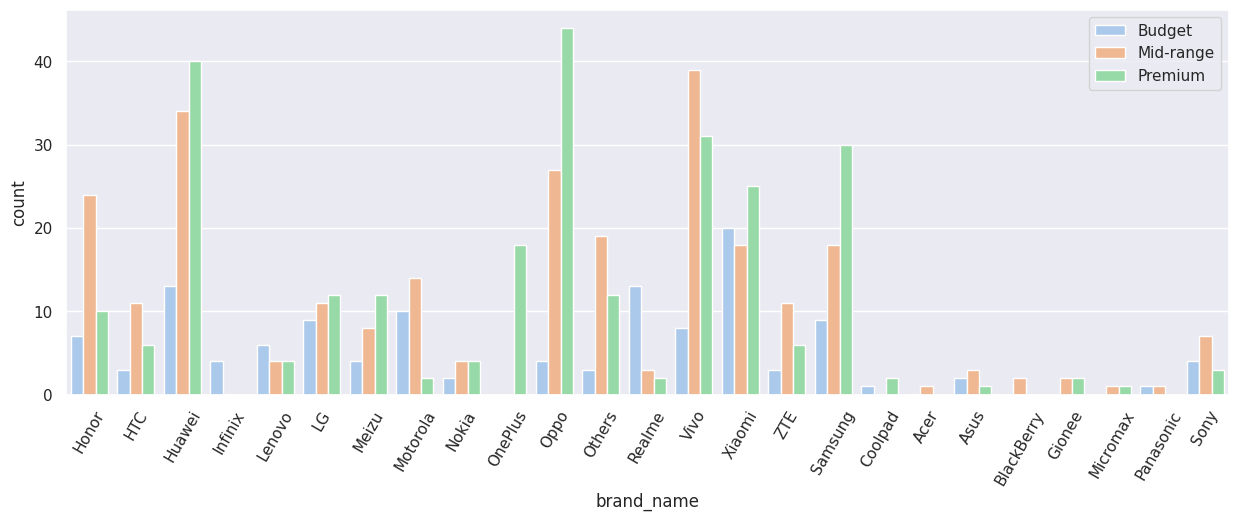

In [51]:
# countplot for devices providing selfie camera greater than 8MP across brands categorywise
plt.figure(figsize=(15, 5))
sns.countplot(data=df_selfie, x="brand_name", hue="device_category", palette="pastel")
plt.xticks(rotation=60)
plt.legend(loc=1)
plt.show()

#### Observations:
* There are 655 devices with more than 8MP selfie cameras.
* Most of the premium category devices provide selfie cameras greater than 8MP
* Oppo many devices with greater than 8MP in its premium category devices.

#### Now a days people create more photo and video content . Instead of cameras for photography and videography they use phone and tablets. Let us look at the devices with main camera greater than 16MP

In [52]:
# daraframe with main camera mp greater than 16 MP
df_main_camera = df[df["main_camera_mp"] > 16]
print(
    f"There are {df_main_camera.shape[0]} devices with main camera greater than 16 MP"
)

There are 94 devices with main camera greater than 16 MP


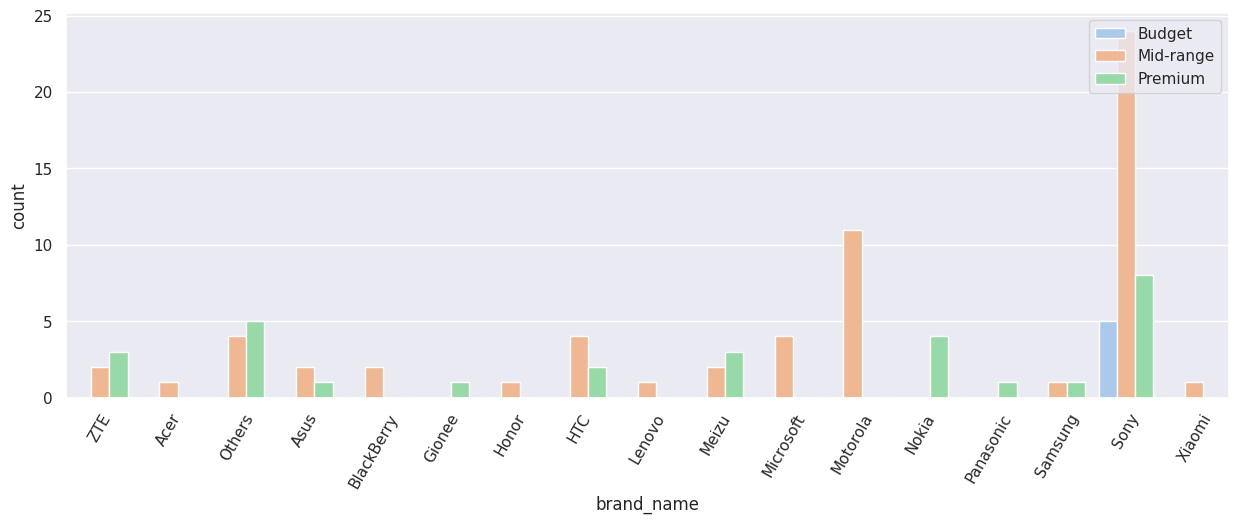

In [53]:
# countplot for devices providing selfie camera greater than 8MP across brands categorywise
plt.figure(figsize=(15, 5))
sns.countplot(
    data=df_main_camera, x="brand_name", hue="device_category", palette="pastel"
)
plt.xticks(rotation=60)
plt.legend(loc=1)
plt.show()

#### Observations:
* There are 94 devices with main camera greater than 16MP
* Most of the mid range devices offer main camera greater than 16MP.
* Only Sony has devices with main camera greater than 16 MP in all 3 categories.

#### Digital content creaters like to have good main camera with large ROM for content creation and easy access and sharing. Let us look at devices with main camer1 greater than 12MP and ROM greater than 128GB

In [54]:
# Dataframe with main camer1 greater than 12MP and  ROM greater than 128GB
df_content_creation = df[(df["int_memory"] > 128) & (df["main_camera_mp"] > 12)]

print(
    f"There are {df_content_creation.shape[0]} devices with main camera greater than 12MP and ROM greater than 128 GB"
)

There are 29 devices with main camera greater than 12MP and ROM greater than 128 GB


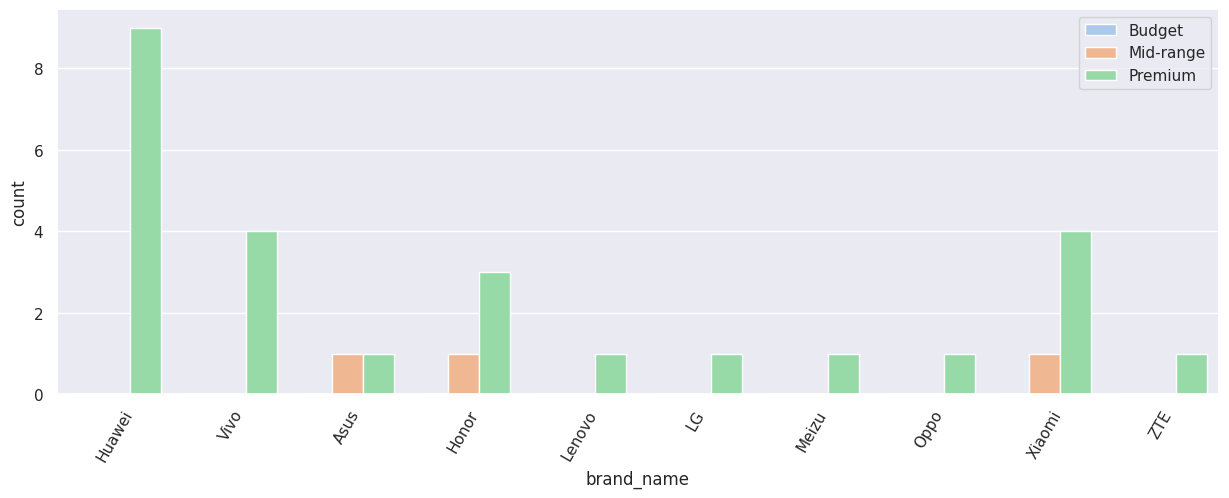

In [55]:
# countplot for devices providing selfie camera greater than 8MP across brands categorywise
plt.figure(figsize=(15, 5))
sns.countplot(
    data=df_content_creation, x="brand_name", hue="device_category", palette="pastel"
)
plt.xticks(rotation=60)
plt.legend(loc=1)
plt.show()


#### Observations:
* It looks like only few premium devices provide main camera greater than 12MP and ROM greater than 128GB

#### Let us see how price of the new devices vary across years

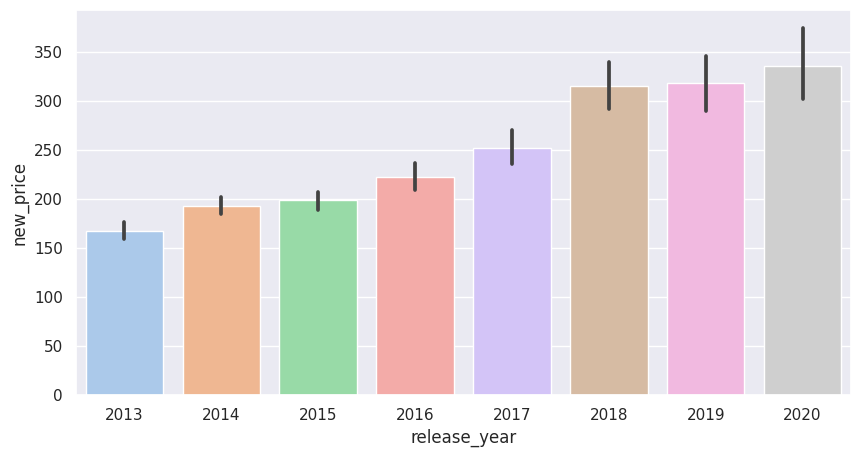

In [56]:
# labeled barplot for new price of device across years
plt.figure(figsize=(10, 5))
sns.barplot(data=df, x="release_year", y="new_price", palette="pastel")
plt.show()


#### Observations:
* Price of the new devices increasing over the years.
* New price is almost same for the year 2018 and 2019.
* Old model devices cost less than new models.


#### Let us see how used price vary across years

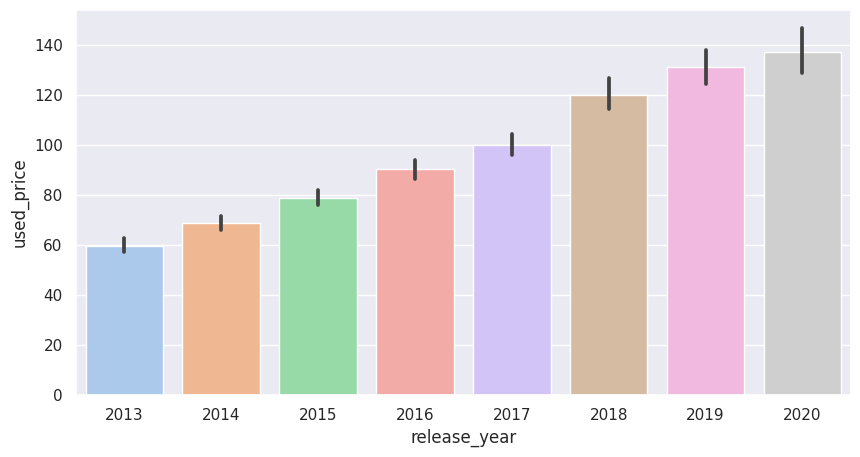

In [57]:
# labeled barplot for used devices across years
plt.figure(figsize=(10, 5))
sns.barplot(data=df, x="release_year", y="used_price", palette="pastel")
plt.show()

#### Observations:
* Price of the used device also like new price,keeps increasing over the years.
* This shows that price of the new device and used device are correlated.
* Also we can say that older model devices are less priced.
* Latest models cost more than older ones.


#### Let us look at 4G and 5g services categorywise

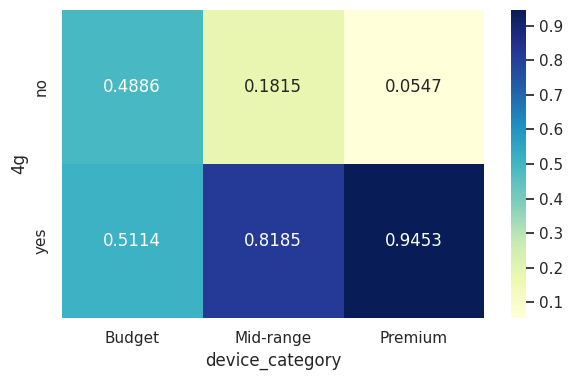

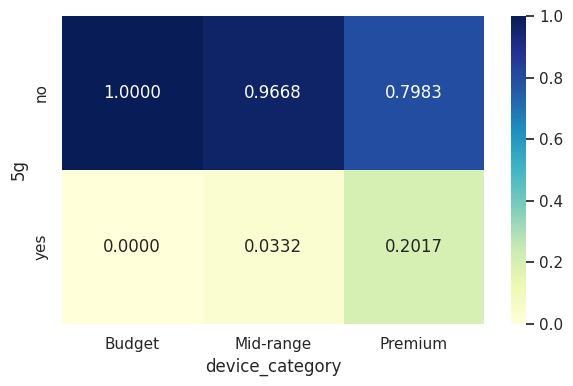

In [58]:
plt.figure(figsize=(15, 4))

plt.subplot(121)
sns.heatmap(
    pd.crosstab(df["4g"], df["device_category"], normalize="columns"),
    annot=True,
    fmt=".4f",
    cmap="YlGnBu",
)

plt.figure(figsize=(15, 4))
plt.subplot(121)
sns.heatmap(
    pd.crosstab(df["5g"], df["device_category"], normalize="columns"),
    annot=True,
    fmt=".4f",
    cmap="YlGnBu",
)
plt.show()


#### Observations:
* Most of the devices do not provide 5G Services.
* Most of the mid-range and premium devices likely to provide 4G services.

#### Let us look at the features that are highly correlated with the price of a used device

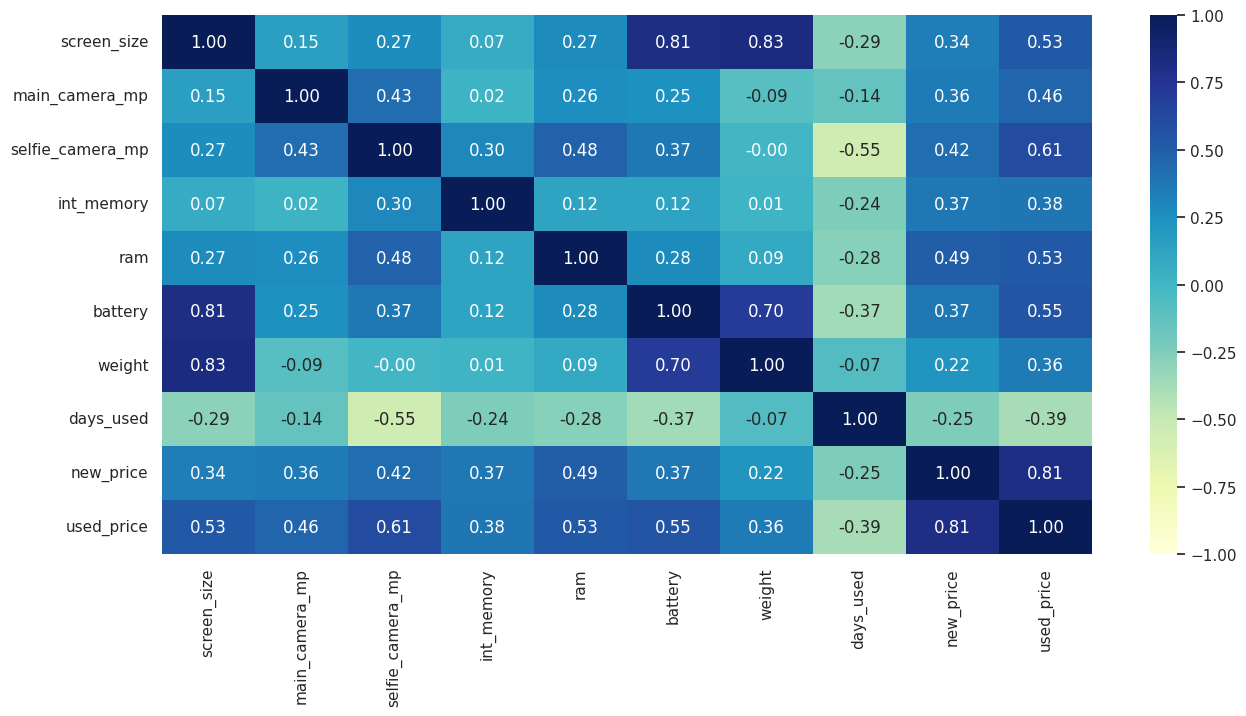

In [59]:
num_cols_list = df.select_dtypes(include=np.number).columns.tolist()

# dropping release_year as it is a temporal variable
num_cols_list.remove("release_year")

plt.figure(figsize=(15, 7))
sns.heatmap(
    df[num_cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="YlGnBu"
)
plt.show()


In [60]:
# displaying correlation of used_price with other attributes
df[num_cols_list].corr()["used_price"]

screen_size         0.529275
main_camera_mp      0.459209
selfie_camera_mp    0.614675
int_memory          0.378347
ram                 0.529434
battery             0.549647
weight              0.357983
days_used          -0.385777
new_price           0.809335
used_price          1.000000
Name: used_price, dtype: float64

#### Observations:
* used price and new price have high positive correlation.
* used price and selfie_camera_mp are having moderate positive correlation.
* used_price is positively correlated to ram and battery.

### Data Preprocessing

#### Missing value imputation
* We will impute the missing values in the data by the column medians grouped by release_year and brand_name.

In [61]:
# let's create a copy of the data
df1 = df.copy()
# checking for missing values
df1.isnull().any()

brand_name          False
os                  False
screen_size         False
4g                  False
5g                  False
main_camera_mp       True
selfie_camera_mp     True
int_memory           True
ram                  True
battery              True
weight               True
release_year        False
days_used           False
new_price           False
used_price          False
device_category     False
dtype: bool

In [63]:
features_to_impute = [
    "main_camera_mp",
    "selfie_camera_mp",
    "int_memory",
    "ram",
    "battery",
    "weight",
]

for feature in features_to_impute:
    df1[feature] = df1.groupby(["release_year", "brand_name"])[feature].transform(
        lambda x: x.fillna(x.median())
    )


In [64]:
# checking for missing values
df1.isnull().any()

brand_name          False
os                  False
screen_size         False
4g                  False
5g                  False
main_camera_mp       True
selfie_camera_mp     True
int_memory          False
ram                 False
battery              True
weight               True
release_year        False
days_used           False
new_price           False
used_price          False
device_category     False
dtype: bool

#### Observation:
* There are still missing values in main_camera_mp,selfie_camera_mp,battery and weight
* Let us impute missing values by median of data grouped by brand_name

In [65]:
for feature in features_to_impute:
    df1[feature] = df1.groupby(["brand_name"])[feature].transform(
        lambda x: x.fillna(x.median())
    )
df1.isnull().any()

brand_name          False
os                  False
screen_size         False
4g                  False
5g                  False
main_camera_mp       True
selfie_camera_mp    False
int_memory          False
ram                 False
battery             False
weight              False
release_year        False
days_used           False
new_price           False
used_price          False
device_category     False
dtype: bool

#### Observation:
* main_camera_mp is still having values.
* Let us impute them with median values.

In [66]:
df1["main_camera_mp"] = df1["main_camera_mp"].fillna(df1["main_camera_mp"].median())
# checking for missing values
df1.isnull().any()

brand_name          False
os                  False
screen_size         False
4g                  False
5g                  False
main_camera_mp      False
selfie_camera_mp    False
int_memory          False
ram                 False
battery             False
weight              False
release_year        False
days_used           False
new_price           False
used_price          False
device_category     False
dtype: bool

#### Observations:
* Now tha data looks free from missing values.

#### Outlier check

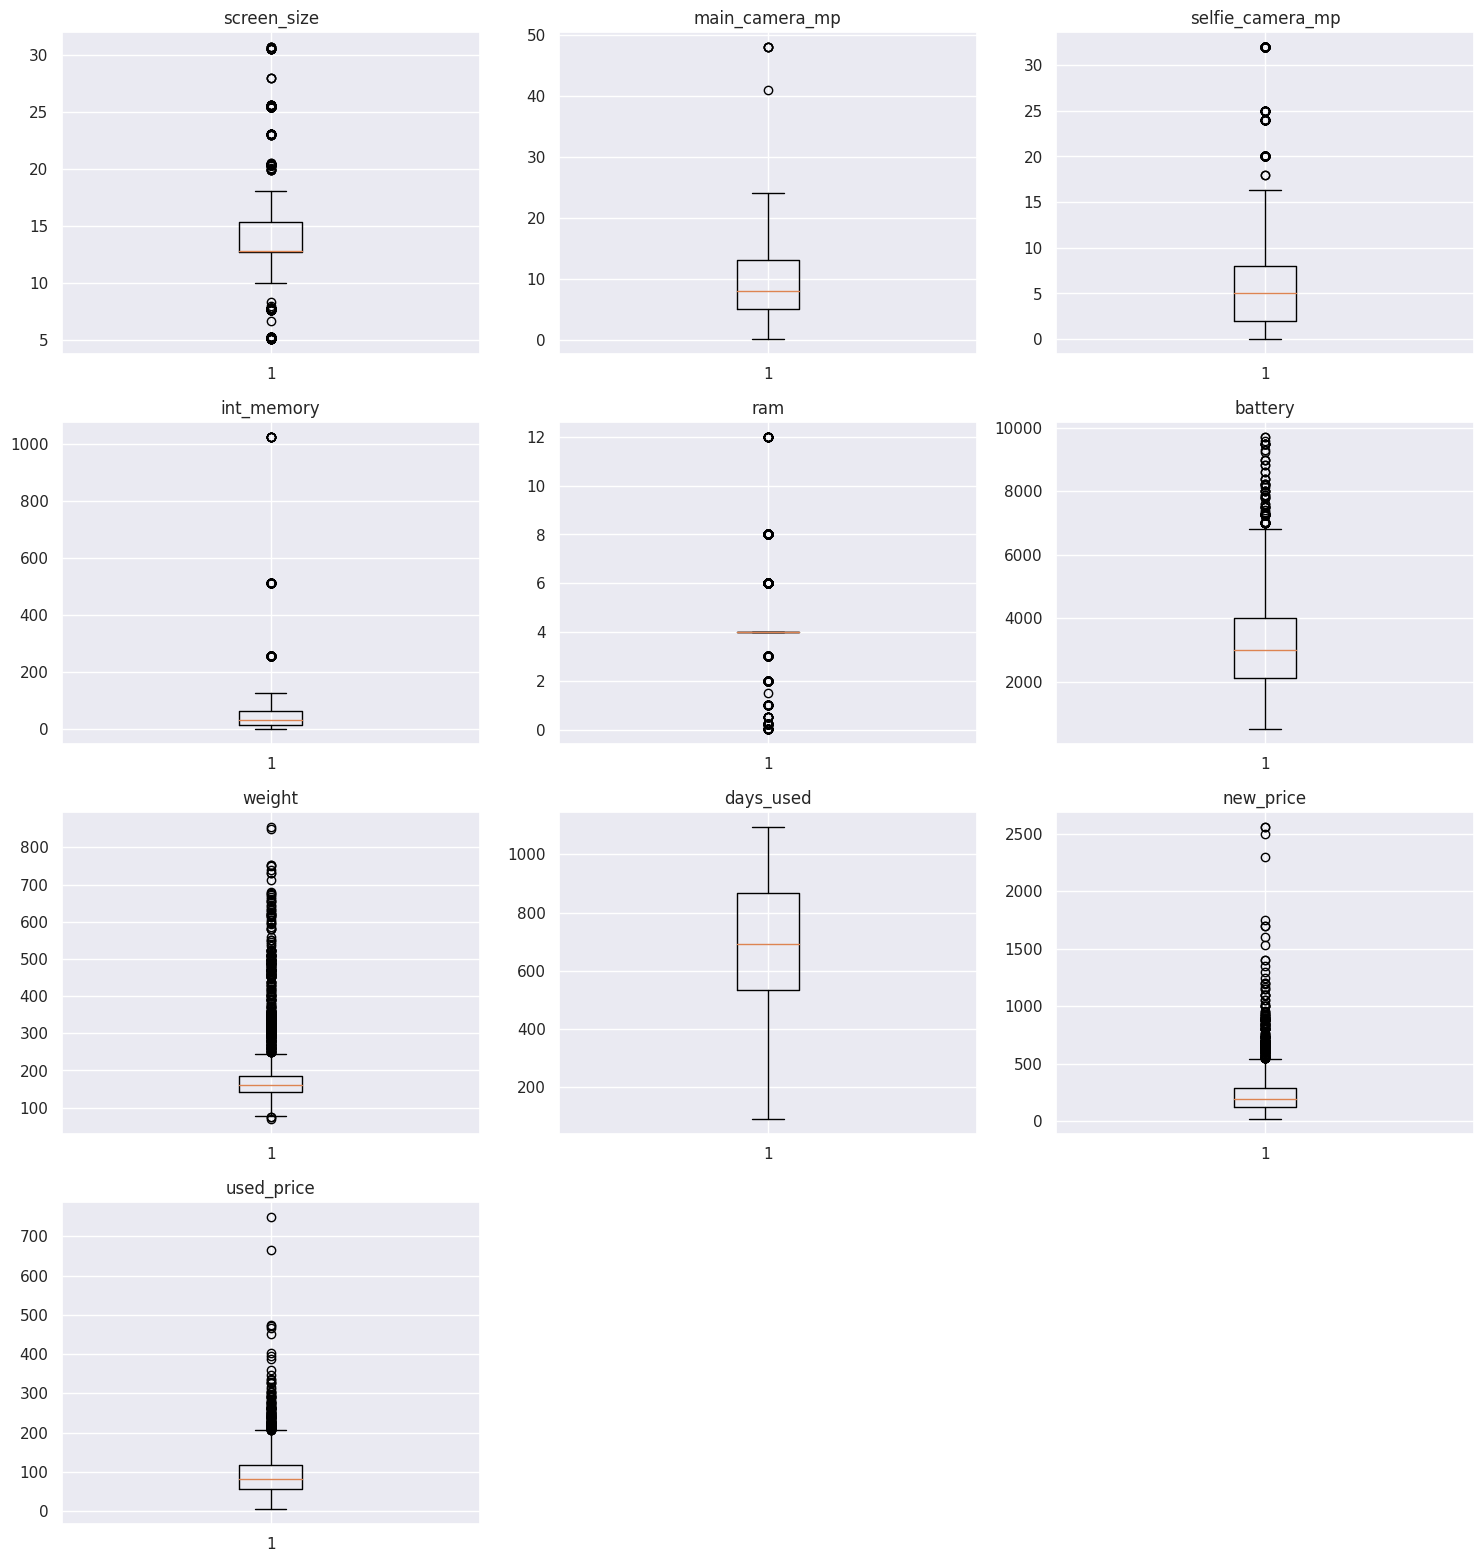

In [67]:
# outlier detection using boxplot
numeric_columns = df1.select_dtypes(include=np.number).columns.tolist()

# dropping release_year as it is a temporal variable
numeric_columns.remove("release_year")


'''for i, variable in enumerate(numeric_columns):
    plt.figure(figsize=(10, 5))
    plt.subplot(121)
    sns.boxplot(data=df1, x=variable)
    
plt.show()'''

plt.figure(figsize=(15, 35))

for i, variable in enumerate(numeric_columns):
    plt.subplot(9, 3, i + 1)
    plt.boxplot(df1[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()


#### Observations:
* Screen size has outliers on both ends.
* main_camera_mp, selfie_camera_mp also have few outliers to the right.
* int_memory has outliers to the right.
* ram has outliers at both ends.
* battery has outliers to the right end.
* weight has large outliers to the right side.
* days_used does not have any outliers.
* new_price and old_price has outliers to the right side.


For most of the columns outliers look like natural part of the population. They does not seem to be impossible values.

#### Variable transformation.
* Let us convert used_price and new_price to log form to deal with skewness in the data.

In [68]:
# let us create a new column used_price_log, new_price_log as normalised version of used_price and new_price repectively
df1["used_price_log"] = np.log(df1["used_price"])
df1["new_price_log"] = np.log(df1["new_price"])


<Axes: xlabel='used_price_log', ylabel='Count'>

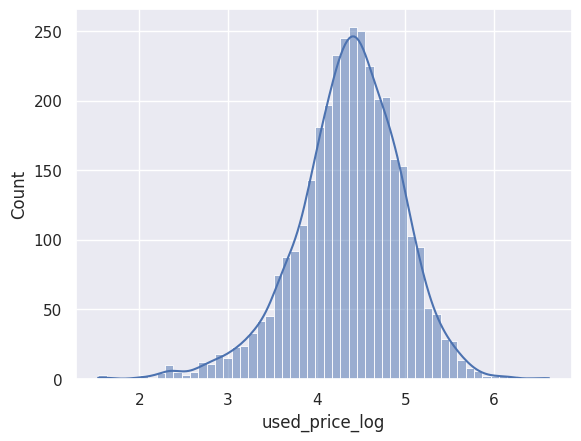

In [69]:
# let us look at used_price_log distribution
sns.histplot(data=df1, x="used_price_log", kde=True)

<Axes: xlabel='new_price_log', ylabel='Count'>

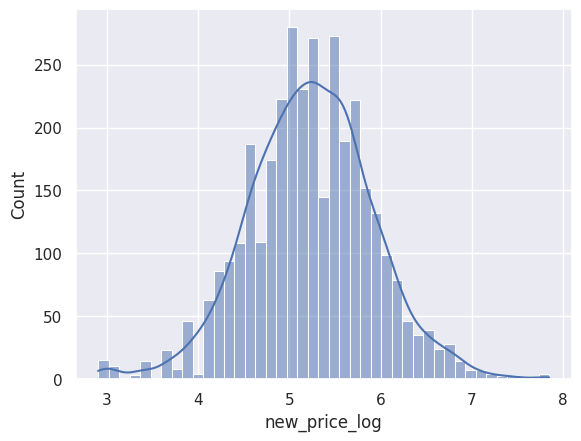

In [70]:
# let us look at new_price_log distribution
sns.histplot(data=df1, x="new_price_log", kde=True)

#### Observation:
* The distribution of used_price_log looks closer to normal than original used_price.
* The distribution of new_price_log looks closer to normal than original new_price.

### EDA after data pre- processing

In [71]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
screen_size,3454.0,13.713115,3.805280,5.080000,12.700000,12.830000,15.340000,30.710000
main_camera_mp,3454.0,9.617597,4.749438,0.080000,5.000000,8.000000,13.000000,48.000000
selfie_camera_mp,3454.0,6.555067,6.968440,0.000000,2.000000,5.000000,8.000000,32.000000
int_memory,3454.0,54.528474,84.934991,0.010000,16.000000,32.000000,64.000000,1024.000000
ram,3454.0,4.032620,1.368598,0.020000,4.000000,4.000000,4.000000,12.000000
battery,3454.0,3132.577446,1298.884193,500.000000,2100.000000,3000.000000,4000.000000,9720.000000
weight,3454.0,182.636856,88.360445,69.000000,142.000000,160.000000,185.000000,855.000000
release_year,3454.0,2015.965258,2.298455,2013.000000,2014.000000,2015.500000,2018.000000,2020.000000
days_used,3454.0,674.869716,248.580166,91.000000,533.500000,690.500000,868.750000,1094.000000
new_price,3454.0,237.038848,194.302782,18.200000,120.342500,189.785000,291.115000,2560.200000


#### Observations:
* There are no missing values in the data as we treated all missing values in original data.
* Mean values of main_camera_mp and battery changed very little after data processing,not significantly.
* Two more columns i.e log-normal form of used_price and new_price are added to dataset.

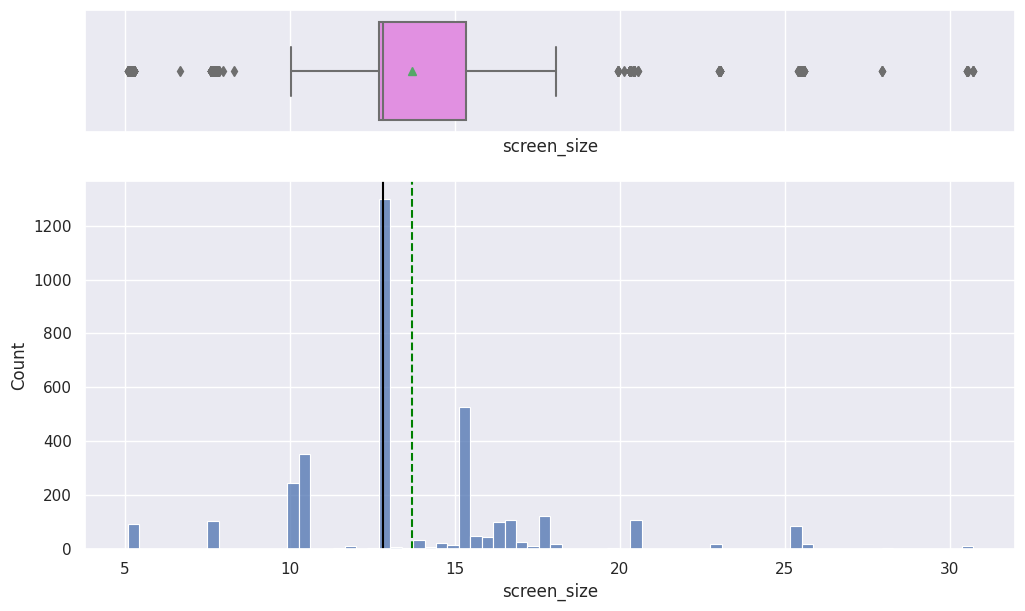

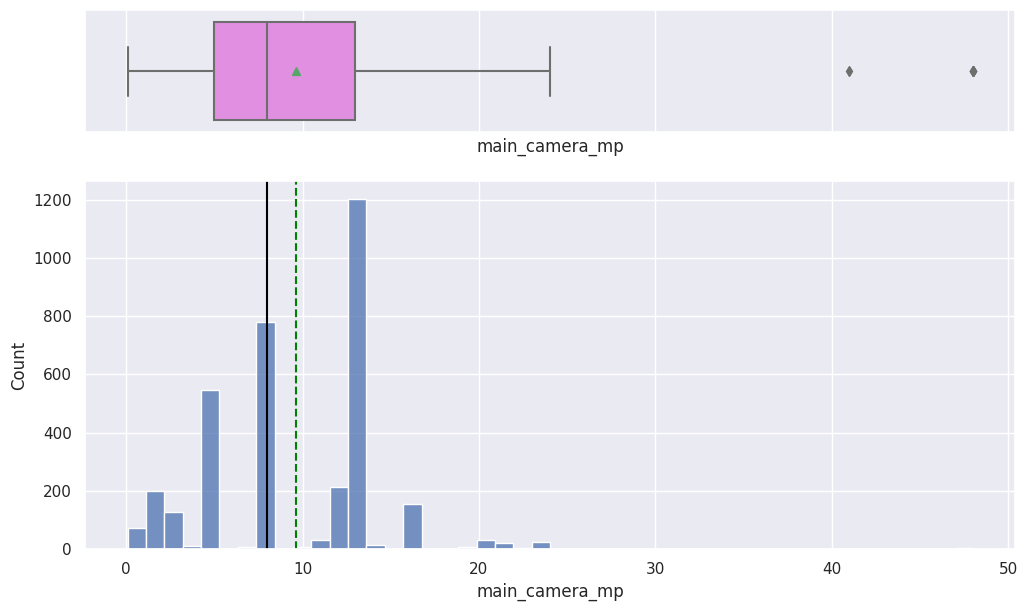

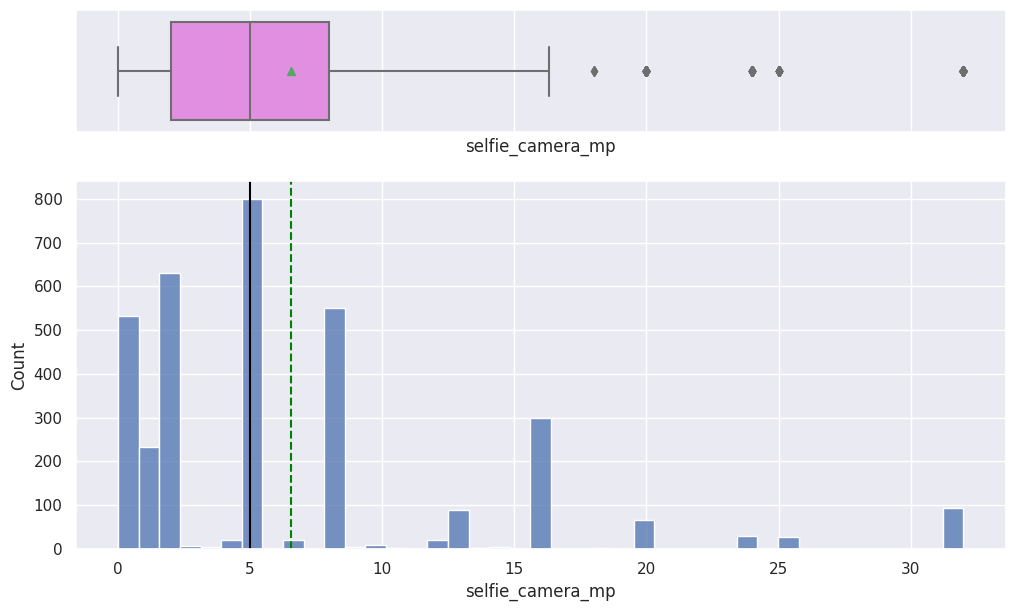

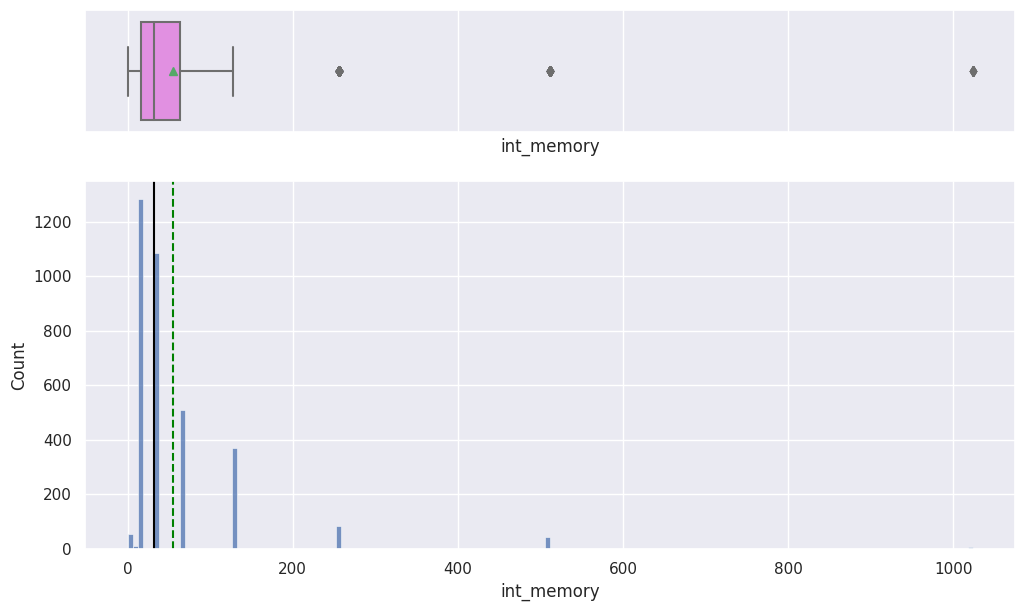

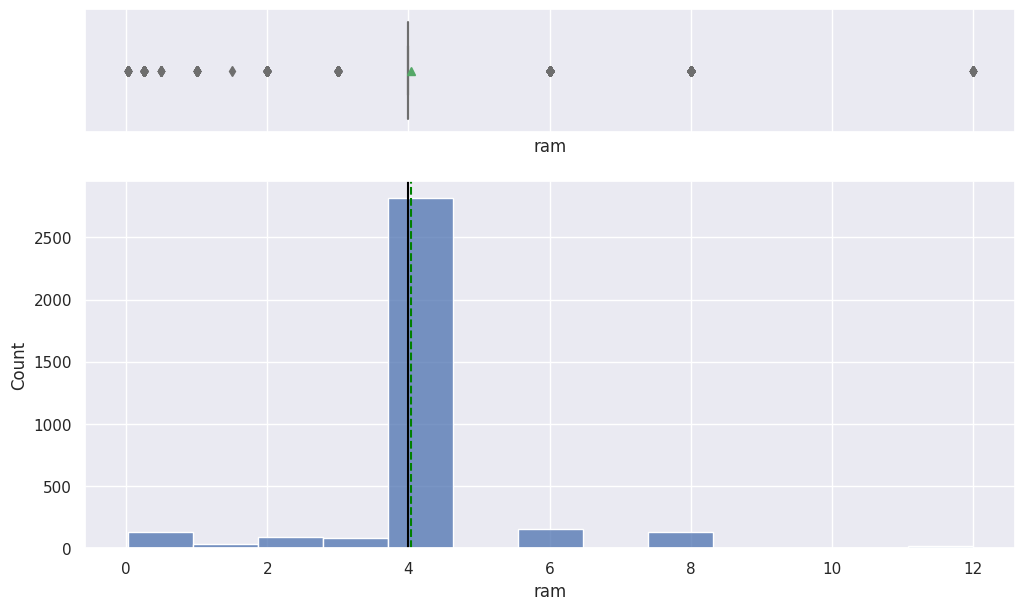

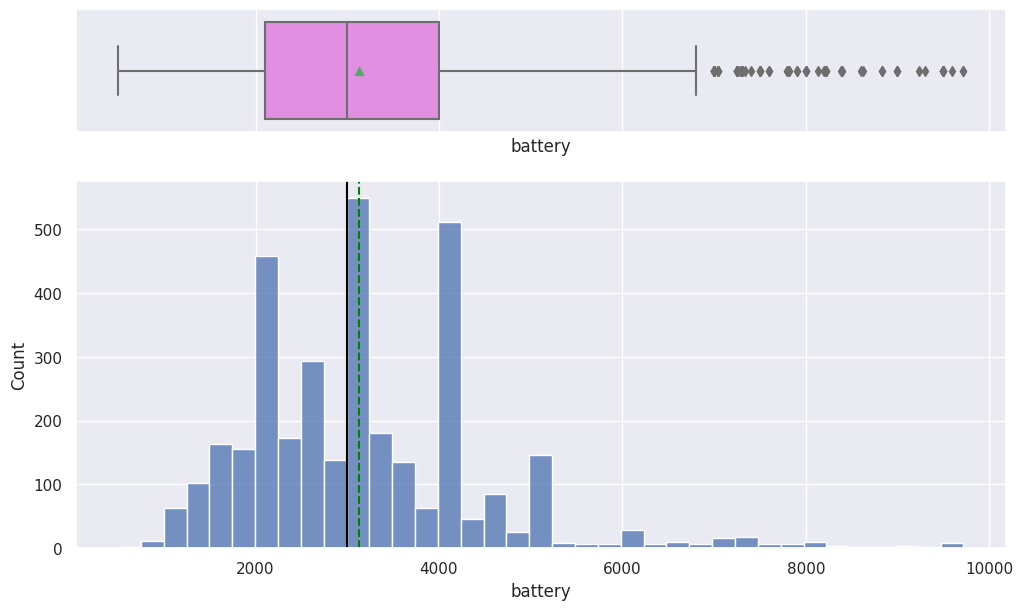

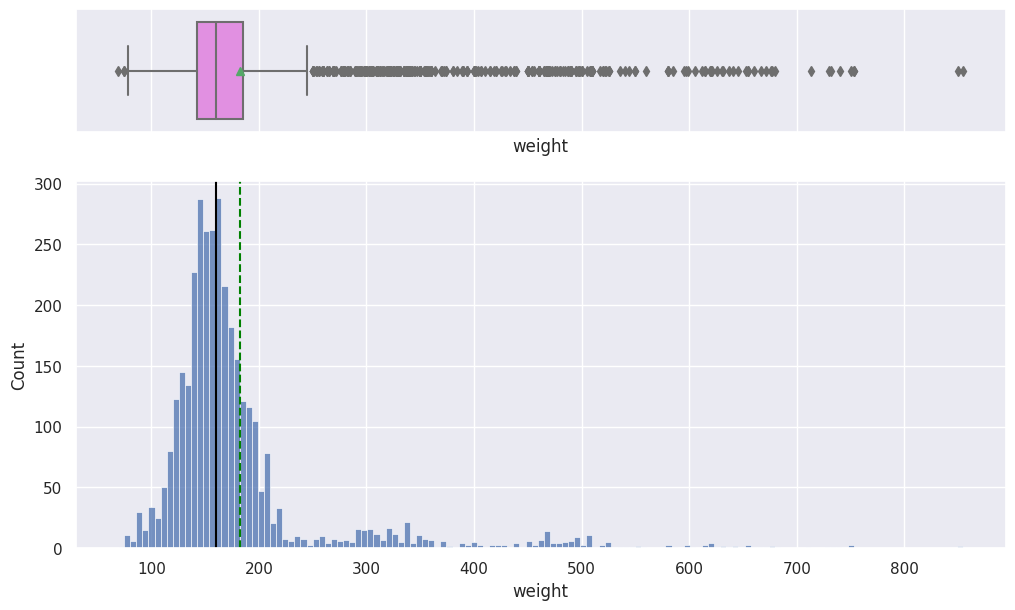

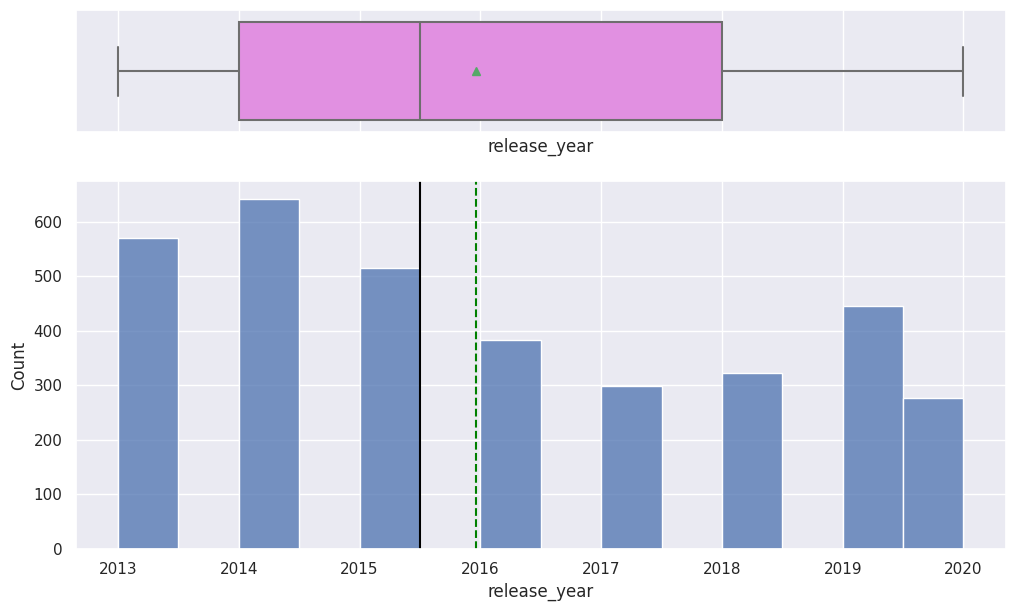

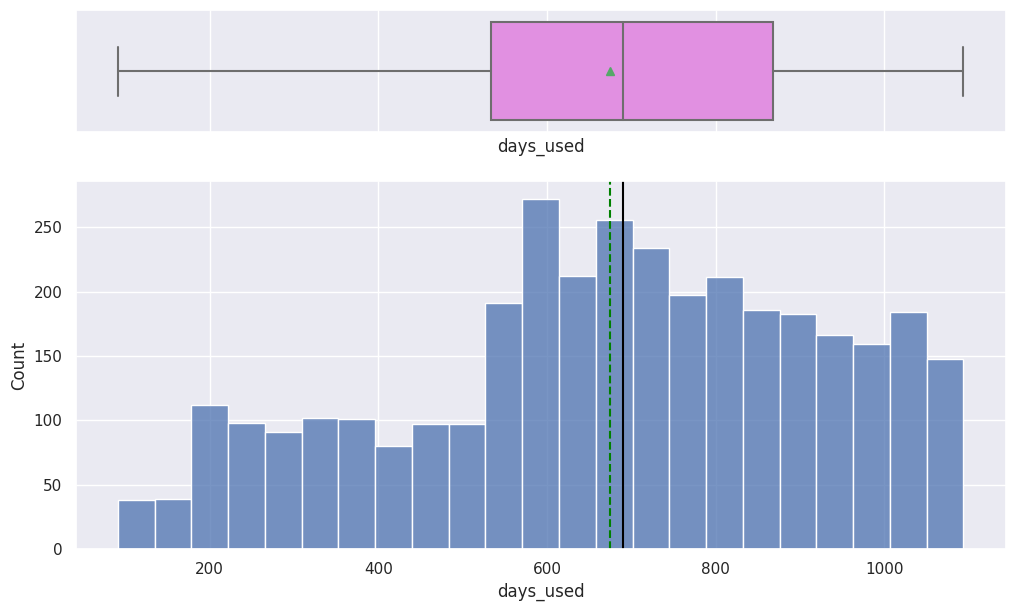

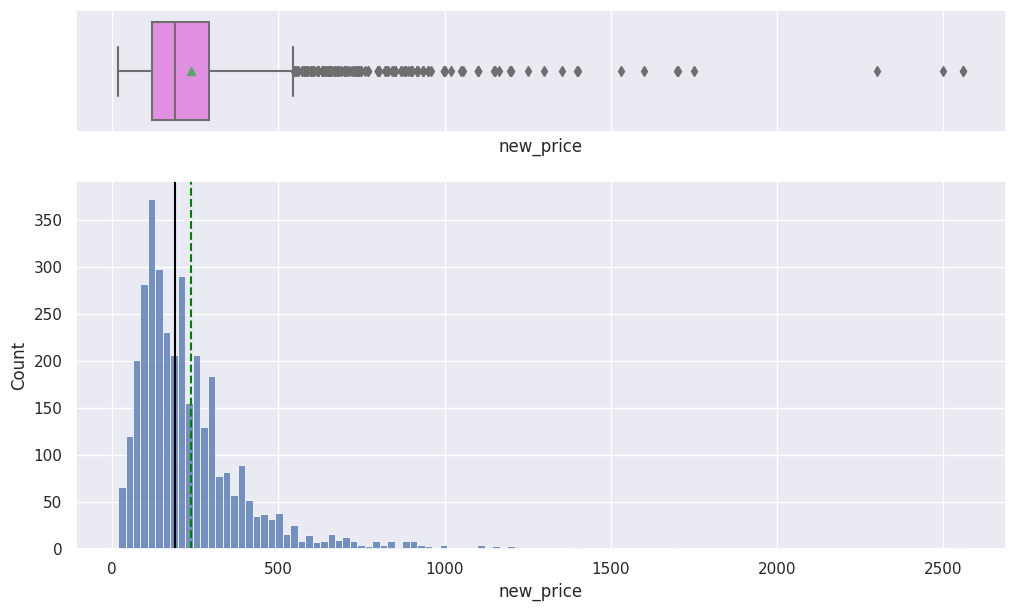

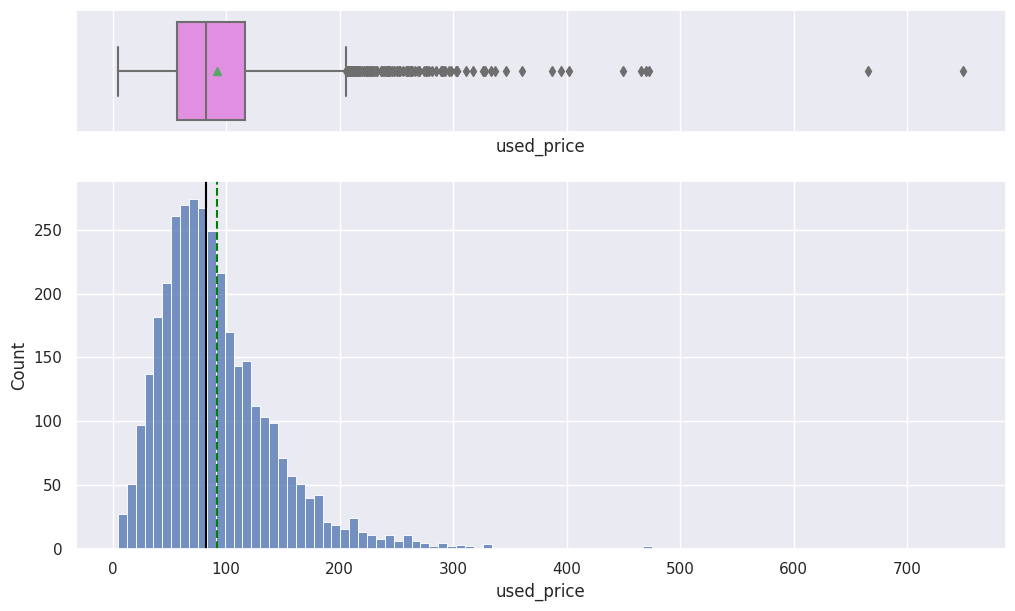

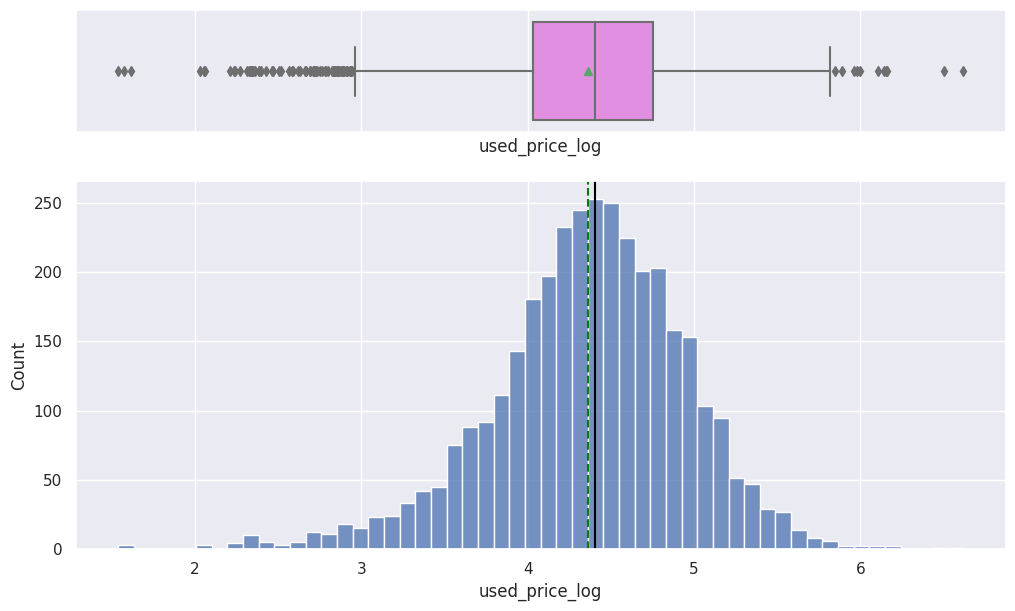

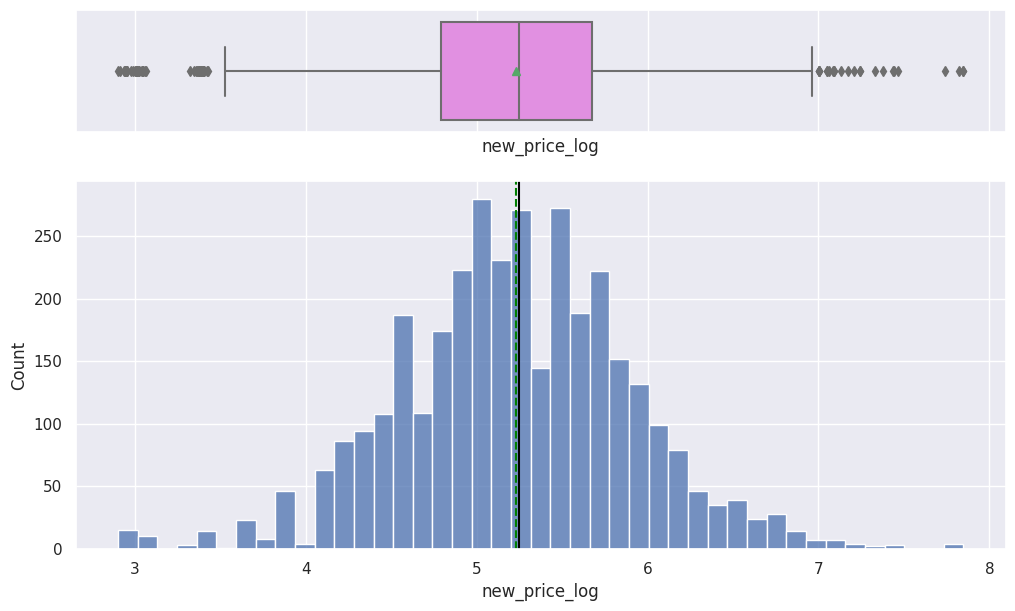

In [72]:
# histogram boxplot of numeric columns
numeric_columns = df1.select_dtypes(include=np.number).columns.tolist()
for col in numeric_columns:
    histogram_boxplot(df1, col)


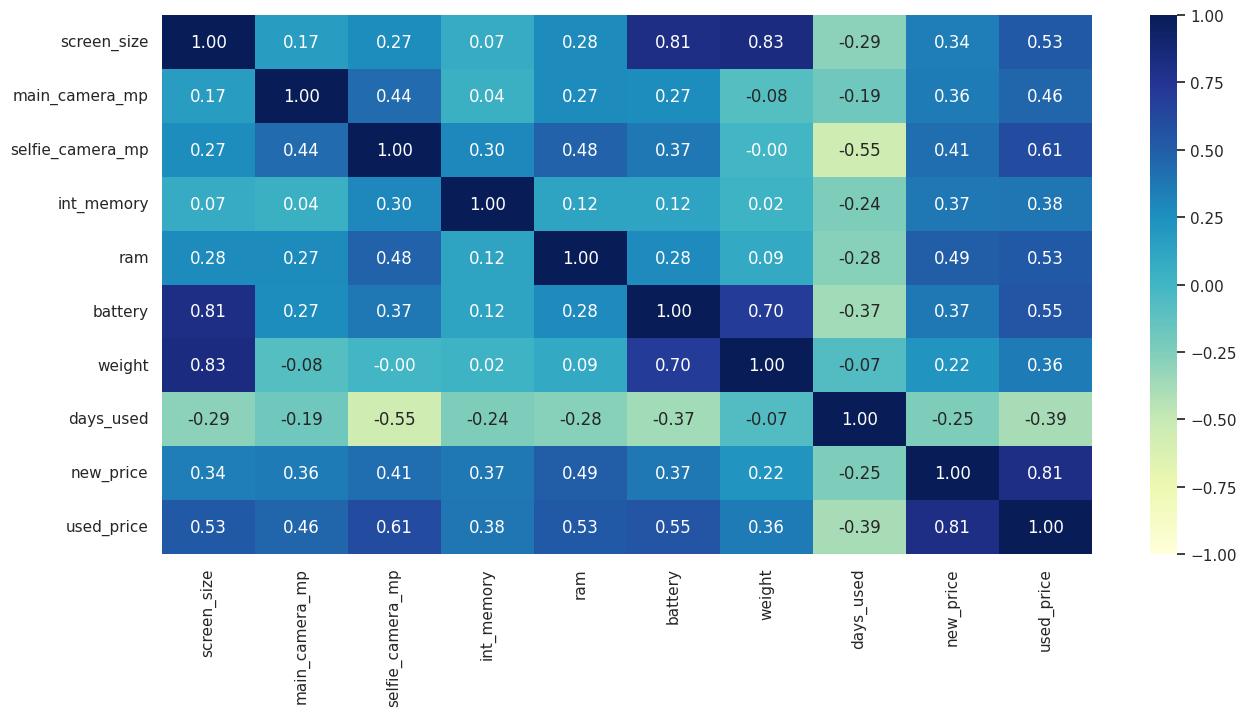

In [73]:
### Let us look at heatmap
num_cols = df1.select_dtypes(include=np.number).columns.tolist()
num_cols.remove("release_year")
num_cols.remove("used_price_log")
num_cols.remove("new_price_log")
df1[num_cols].corr()["used_price"]
plt.figure(figsize=(15, 7))
sns.heatmap(df1[num_cols].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="YlGnBu")
plt.show()

#### Observation:
* No significant change in correlation after data preprocessing

### Data Preparation for modeling
* We want to predict the used device price, so we will use the normalized version used_price_log for modeling.
* Before we proceed to build a model, we'll have to encode categorical features.
* We'll split the data into train and test to be able to evaluate the model that we build on the train data.

In [74]:
# defining the dependent and independent variables
X = df1.drop(["new_price", "used_price", "used_price_log", "device_category"], axis=1)
y = df1["used_price_log"]

In [75]:
X.head()

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,new_price_log
0,Honor,Android,14.50,yes,no,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,4.715100
1,Honor,Android,17.30,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,5.519018
2,Honor,Android,16.69,yes,yes,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,5.884631
3,Honor,Android,25.50,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,5.630961
4,Honor,Android,15.32,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,4.947837


In [76]:
y.head()

0    4.307572
1    5.162097
2    5.111084
3    5.135387
4    4.389995
Name: used_price_log, dtype: float64

In [77]:
# creating dummy variables
X = pd.get_dummies(
    X,
    columns=X.select_dtypes(include=["object", "category"]).columns.tolist(),
    drop_first=True,
)
X.head()

,screen_size,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,new_price_log,...,brand_name_Spice,brand_name_Vivo,brand_name_XOLO,brand_name_Xiaomi,brand_name_ZTE,os_Others,os_Windows,os_iOS,4g_yes,5g_yes
0,14.50,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,4.715100,...,0,0,0,0,0,0,0,0,1,0
1,17.30,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,5.519018,...,0,0,0,0,0,0,0,0,1,1
2,16.69,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,5.884631,...,0,0,0,0,0,0,0,0,1,1
3,25.50,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,5.630961,...,0,0,0,0,0,0,0,0,1,1
4,15.32,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,4.947837,...,0,0,0,0,0,0,0,0,1,0


In [78]:
# splitting the data in 70:30 ratio for train to test data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=1
)


In [79]:
print("Number of rows in train data =", X_train.shape[0])
print("Number of rows in test data =", X_test.shape[0])

Number of rows in train data = 2417
Number of rows in test data = 1037


In [80]:
# adding constant to the train data
x_train1 = sm.add_constant(X_train)
# adding constant to the test data
x_test1 = sm.add_constant(X_test)


## Building a Linear Regression model

In [81]:
#building linear regression model
model1 = sm.OLS(y_train, x_train1).fit()
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:         used_price_log   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     268.7
Date:                Wed, 26 Apr 2023   Prob (F-statistic):               0.00
Time:                        22:04:00   Log-Likelihood:                 123.85
No. Observations:                2417   AIC:                            -149.7
Df Residuals:                    2368   BIC:                             134.0
Df Model:                          48                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                   -46.50

### Model performance evaluation
* We will check the model performance on the actual prices and not the log values.
* We will create a function that will convert the log prices to actual prices and then check the performance.
* We will be using metric functions defined in sklearn for RMSE and MAE.
* We will define a function to calculate MAPE.

In [82]:
# function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100


def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    # computing the actual prices by using the exponential function
    target = np.exp(target)
    pred = np.exp(pred)

    rmse = round(np.sqrt(mean_squared_error(target, pred)), 3)  # to compute RMSE
    mae = round(mean_absolute_error(target, pred), 3)  # to compute MAE
    mape = round(mape_score(target, pred), 3)  # to compute MAPE
    r_squared = round(r2_score(target, pred), 3)
    r_squared_adj = round(adj_r2_score(predictors, target, pred), 3)

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "MAPE": mape,
            "R-squared": r_squared,
            "Adj-R-squared": r_squared_adj,
        },
        index=[0],
    )

    return df_perf


In [83]:
# checking model performance on train set (seen 70% data)
print("Training Performance\n")
model1_train_perf = model_performance_regression(model1, x_train1, y_train)
model1_train_perf

Training Performance



,RMSE,MAE,MAPE,R-squared,Adj-R-squared
0,25.125,16.54,18.873,0.795,0.791


In [84]:
# checking model performance on test set (seen 30% data)
print("Test Performance\n")
model1_test_perf = model_performance_regression(model1, x_test1, y_test)
model1_test_perf

Test Performance



,RMSE,MAE,MAPE,R-squared,Adj-R-squared
0,24.258,16.599,19.451,0.789,0.779


#### Observations:
* The training  R2
  is 0.795,i.e 79.5% of the variance in the training data is explained by the model.
* The testing  R2
  is 0.789, i.e. 78.9 % of the variance in the testing data is explained by the model.
* Model is not underfitting.
* Also both scores are comparable.
* The train and test RMSEare comparable.So the model is not overfitting either.
*MAE in test data suggests that the model can predict used_price of a device within a mean error of 16.5 euros on the test data.
*MAPE of 19.45 on the test data means that we are able to predict within 19.45% of the used_price.

### Checking Linear Regression Assumptions
* In order to make statistical inferences from a linear regression model, it is important to ensure that the assumptions of linear regression are satisfied.
* So, We will be checking the following Linear Regression assumptions:
No Multicollinearity

1.Linearity of variables

2.Independence of error terms

3.Normality of error terms

4.No Heteroscedasticity





### TEST FOR MULTICOLLINEARITY
* We will test for multicollinearity using VIF.

In [85]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# we will define a function to check VIF
def checking_vif(predictors):
    vif = pd.DataFrame()
    vif["feature"] = predictors.columns

    # calculating VIF for each feature
    vif["VIF"] = [
        variance_inflation_factor(predictors.values, i)
        for i in range(len(predictors.columns))
    ]
    return vif

In [86]:
print("VIF values: \n\n{}\n".format(round(checking_vif(x_train1), 2)))

VIF values: 

                  feature         VIF
0                   const  3791593.34
1             screen_size        7.68
2          main_camera_mp        2.29
3        selfie_camera_mp        2.81
4              int_memory        1.36
5                     ram        2.28
6                 battery        4.08
7                  weight        6.40
8            release_year        4.90
9               days_used        2.66
10          new_price_log        3.12
11     brand_name_Alcatel        3.41
12       brand_name_Apple       13.06
13        brand_name_Asus        3.33
14  brand_name_BlackBerry        1.63
15      brand_name_Celkon        1.77
16     brand_name_Coolpad        1.47
17      brand_name_Gionee        1.95
18      brand_name_Google        1.32
19         brand_name_HTC        3.41
20       brand_name_Honor        3.34
21      brand_name_Huawei        5.98
22     brand_name_Infinix        1.28
23     brand_name_Karbonn        1.57
24          brand_name_LG        4.8

#### Observations:
* There are lots of independent variables with VIF > 5.


#### Let us check p-values

In [87]:
p_values = model1.pvalues
p_values

const                     4.607741e-07
screen_size               1.051088e-12
main_camera_mp            5.444523e-42
selfie_camera_mp          3.087759e-32
int_memory                9.886242e-02
ram                       8.929010e-06
battery                   2.034761e-02
weight                    1.038516e-13
release_year              2.246456e-07
days_used                 1.720150e-01
new_price_log            3.765727e-218
brand_name_Alcatel        7.468342e-01
brand_name_Apple          9.795154e-01
brand_name_Asus           7.532381e-01
brand_name_BlackBerry     6.690743e-01
brand_name_Celkon         4.799310e-01
brand_name_Coolpad        7.742164e-01
brand_name_Gionee         4.382346e-01
brand_name_Google         6.999582e-01
brand_name_HTC            7.868026e-01
brand_name_Honor          5.197966e-01
brand_name_Huawei         9.635295e-01
brand_name_Infinix        7.984769e-02
brand_name_Karbonn        1.601869e-01
brand_name_LG             7.712126e-01
brand_name_Lava          

#### All dummy variables of brand name have p-val >0.05. We can drop all dummy variables of brand_name together and then check VIF

In [89]:
x_col = list(x_train1.columns)

In [90]:
# getting all the dummy varibles for brand_name
brands_to_drop = list()
for i in x_col:
    if i.startswith("brand_name"):
        brands_to_drop.append(i)


In [91]:
# dropping dummy variables since p-values of all dummy variables are >0.5
x_train1.drop(brands_to_drop, axis=1, inplace=True)

In [92]:
print("VIF values: \n\n{}\n".format(round(checking_vif(x_train1), 2)))

VIF values: 

             feature         VIF
0              const  3581577.21
1        screen_size        7.25
2     main_camera_mp        2.00
3   selfie_camera_mp        2.58
4         int_memory        1.25
5                ram        2.12
6            battery        3.85
7             weight        6.13
8       release_year        4.63
9          days_used        2.58
10     new_price_log        2.63
11         os_Others        1.48
12        os_Windows        1.02
13            os_iOS        1.09
14            4g_yes        2.26
15            5g_yes        1.72



#### Dropping dummy variables reduced VIF of other variables.

Screen_size and weight are having VIFs greatet than 5. Let us drop weight and check VIF

In [93]:
x_train2 = x_train1.drop(["weight"], axis=1)
x_test2 = x_test1.drop(["weight"], axis=1)
model2 = sm.OLS(y_train, x_train2)
res2 = model2.fit()
print(
    "R-squared:",
    np.round(res2.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(res2.rsquared_adj, 3),
)

R-squared: 0.838 
Adjusted R-squared: 0.837


On dropping weight adjusted  R2
  reduced by 0.004

In [94]:
# check VIF again
print("VIF values: \n\n{}\n".format(round(checking_vif(x_train2), 2)))

VIF values: 

             feature         VIF
0              const  3459555.20
1        screen_size        3.40
2     main_camera_mp        1.90
3   selfie_camera_mp        2.54
4         int_memory        1.25
5                ram        2.11
6            battery        3.47
7       release_year        4.47
8          days_used        2.56
9      new_price_log        2.63
10         os_Others        1.37
11        os_Windows        1.02
12            os_iOS        1.08
13            4g_yes        2.24
14            5g_yes        1.72



Dropping weight also reduces VIF of screen size. Now there are no variables with VIF greater than 5

#### Dropping high p-value variables
* We will drop the predictor variables having a p-value greater than 0.05 as they do not significantly impact the target variable.
* But sometimes p-values change after dropping a variable. So, we'll not drop all variables at once.
* Instead, we will do the following:
 - Build a model, check the p-values of the variables, and drop the column with the highest p-value.
 - Create a new model without the dropped feature, check the p-values of the variables, and drop the column with the highest p-value.
 - Repeat the above two steps till there are no columns with p-value > 0.05.

In [95]:
# initial list of columns
cols = (
    x_train2.columns.tolist()
)  

# setting an initial max p-value
max_p_value = 1

while len(cols) > 0:
    # defining the train set
    x_train_aux = x_train2[
        cols
    ]  

    # fitting the model
    model = sm.OLS(y_train, x_train_aux).fit()

    # getting the p-values and the maximum p-value
    p_values = model.pvalues
    max_p_value = max(p_values)
   

    # name of the variable with maximum p-value
    feature_with_p_max = p_values.idxmax()
   
    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
    else:
        break

selected_features = cols

In [96]:
x_train3 = x_train2[selected_features]
x_test3 = x_test2[selected_features]

In [97]:
#printing selected features
print(selected_features)

['const', 'screen_size', 'main_camera_mp', 'selfie_camera_mp', 'ram', 'release_year', 'days_used', 'new_price_log', '4g_yes']


In [98]:
# let us build a model using selected features
model3 = sm.OLS(y_train, x_train3).fit()

print(
    "R-squared:",
    np.round(model3.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(model3.rsquared_adj, 3),
)

R-squared: 0.838 
Adjusted R-squared: 0.837


In [99]:
# model summary
print(model3.summary())

                            OLS Regression Results                            
Dep. Variable:         used_price_log   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     1556.
Date:                Wed, 26 Apr 2023   Prob (F-statistic):               0.00
Time:                        22:14:06   Log-Likelihood:                 70.534
No. Observations:                2417   AIC:                            -123.1
Df Residuals:                    2408   BIC:                            -70.96
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const              -37.8400      8.705  

In [100]:
# checking model performance on train set 
print("Training Performance\n")
model3_train_perf = model_performance_regression(model3, x_train3, y_train)
model3_train_perf

Training Performance



,RMSE,MAE,MAPE,R-squared,Adj-R-squared
0,25.458,16.843,19.303,0.789,0.789


In [101]:
# checking model performance on test set 
print("Test Performance\n")
model3_test_perf = model_performance_regression(model3, x_test3, y_test)
model3_test_perf

Test Performance



,RMSE,MAE,MAPE,R-squared,Adj-R-squared
0,23.904,16.433,19.388,0.795,0.794


### Now we'll check the rest of the assumptions on model3.
* Linearity of variables

* Independence of error terms

* Normality of error terms

* No Heteroscedasticity

### TEST FOR LINEARITY AND INDEPENDENCE
We will test for linearity and independence by making a plot of fitted values vs residuals and checking for patterns.

In [102]:
# let us create a dataframe with actual, fitted and residual values
df_pred = pd.DataFrame()

df_pred[
    "Actual Values"
] = y_train.values.flatten()  
df_pred["Fitted Values"] = model3.fittedvalues.values  # predicted values
df_pred["Residuals"] = model3.resid.values  # residuals


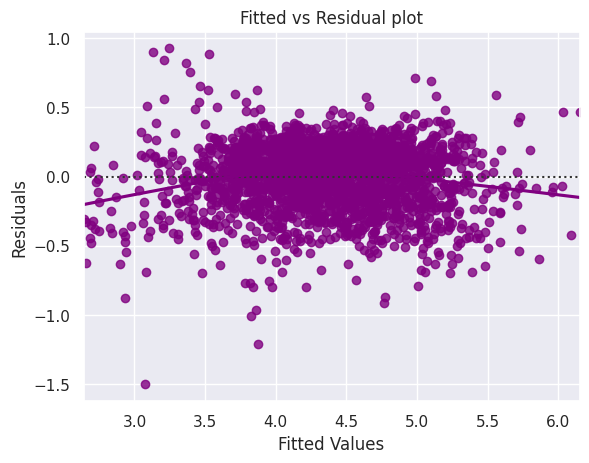

In [103]:
# let's plot the fitted values vs residuals

sns.residplot(
    data=df_pred, x="Fitted Values", y="Residuals", color="purple", lowess=True
)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Fitted vs Residual plot")
plt.show()

There is no pattern in residual v/s fitted values. So we say that model is linear.

### TEST FOR NORMALITY
We will test for normality by checking the distribution of residuals, by checking the Q-Q plot of residuals, and by using the Shapiro-Wilk test.

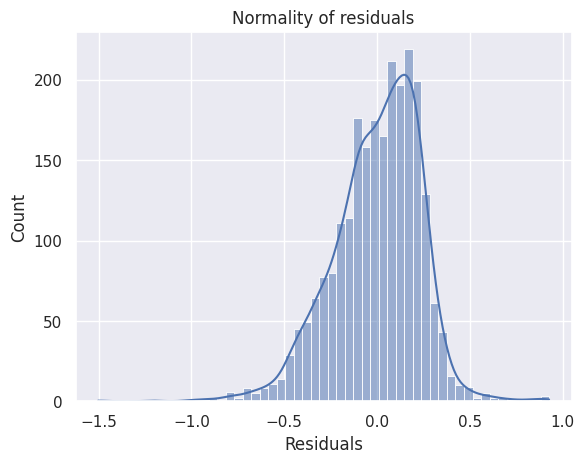

In [104]:
sns.histplot(df_pred["Residuals"], kde=True)
plt.title("Normality of residuals")
plt.show()

The residuals look almost normally distributed.

The QQ plot of residuals can be used to visually check the normality assumption. The normal probability plot of residuals should approximately follow a straight line.

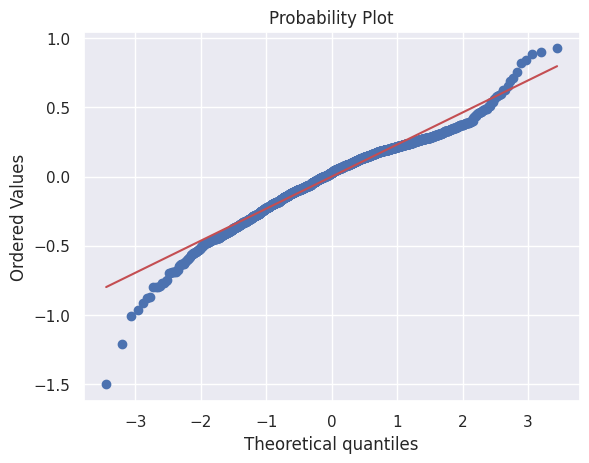

In [105]:
import pylab
import scipy.stats as stats

stats.probplot(df_pred["Residuals"], dist="norm", plot=pylab)
plt.show()

Most of the points are lying on the straight line in QQ plot.

#### The Shapiro-Wilk test can also be used for checking the normality. The null and alternate hypotheses of the test are as follows:

Null hypothesis - Data is normally distributed.
Alternate hypothesis - Data is not normally distributed.

In [106]:
stats.shapiro(df_pred["Residuals"])

ShapiroResult(statistic=0.9712689518928528, pvalue=1.2969799215209546e-21)

* Since p-value < 0.05, the residuals are not normal as per shapiro test.
* However, as an approximation, we might be willing to accept this distribution as close to being normal

#### TEST FOR HOMOSCEDASTICITY
We will test for homoscedasticity by using the goldfeldquandt test.

In [108]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

name = ["F statistic", "p-value"]
test = sms.het_goldfeldquandt(df_pred["Residuals"], x_train3)
lzip(name, test)

[('F statistic', 1.0648757500800876), ('p-value', 0.13825250199572814)]

## Final Model Summary

In [109]:
# model summary
print(model3.summary())

                            OLS Regression Results                            
Dep. Variable:         used_price_log   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     1556.
Date:                Wed, 26 Apr 2023   Prob (F-statistic):               0.00
Time:                        22:20:08   Log-Likelihood:                 70.534
No. Observations:                2417   AIC:                            -123.1
Df Residuals:                    2408   BIC:                            -70.96
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const              -37.8400      8.705  

### Automating equation of fit
* used_price is in log from.
** To interpret independent variables that are not log transformed,let us exponentiate the coefficient, subtract one from this number, and multiply by 100. This gives the percent increase (or decrease) in the response for every one-unit increase in the independent variable.
* To interpret new_price which is in log form
** Interpret the coefficient as the percent increase in the used_price variable for every 1% increase in the new_price variable.

In [110]:
# Let us write the equation of linear regression

coeff_ind = list(model3.params.copy())
ind_var = list(x_train3.columns.copy())

Equation = "used_price ="
print(Equation, end=" ")
for i in range(len(ind_var)):
    if i == 0:
        print(round(coeff_ind[i], 4), "+", end=" ")

    elif i != len(ind_var) - 1:

        if ind_var[i] == "new_price_log":

            print(
                "(",
                coeff_ind[i],
                "%",
                ")*(",
                ind_var[i],
                "%",
                ")",
                "+",
                end=" ",
            ),
        else:
            print(
                "(",
                round(((np.exp(coeff_ind[i]) - 1) * 100), 4),
                "%",
                ")*(",
                ind_var[i],
                ")",
                "+",
                end=" ",
            )
    else:
        if ind_var[i] == "new_price_log":

            print(
                "(",
                coeff_ind[i],
                "%",
                ")*(",
                ind_var[i],
                "%",
                ")",
                "+",
                end=" ",
            )
        else:

            print("(", round(coeff_ind[i], 4), ")*(", ind_var[i], ")")

used_price = -37.84 + ( 4.4213 % )*( screen_size ) + ( 1.8986 % )*( main_camera_mp ) + ( 1.3381 % )*( selfie_camera_mp ) + ( 1.5762 % )*( ram ) + ( 1.9528 % )*( release_year ) + ( 0.0063 % )*( days_used ) + ( 0.42550746460550926 % )*( new_price_log % ) + ( 0.0365 )*( 4g_yes )


### Let us compare initial and final model

In [111]:
# training performance comparison

models_train_comp_df = pd.concat(
    [model1_train_perf.T, model3_train_perf.T],
    axis=1,
)

models_train_comp_df.columns = [
    "Linear Regression (all variables)",
    "Linear Regression (selected variables)",
]

print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Linear Regression (all variables),Linear Regression (selected variables)
RMSE,25.125,25.458
MAE,16.540,16.843
MAPE,18.873,19.303
R-squared,0.795,0.789
Adj-R-squared,0.791,0.789


In [112]:
# test performance comparison

models_test_comp_df = pd.concat(
    [model1_test_perf.T, model3_test_perf.T],
    axis=1,
)

models_test_comp_df.columns = [
    "Linear Regression (all variables)",
    "Linear Regression (selected variables)",
]

print("Test performance comparison:")
models_test_comp_df

Test performance comparison:


,Linear Regression (all variables),Linear Regression (selected variables)
RMSE,24.258,23.904
MAE,16.599,16.433
MAPE,19.451,19.388
R-squared,0.789,0.795
Adj-R-squared,0.779,0.794


### Performance of initial and final model are close to each other.
#### Observations:
* The training  R2
  is 0.795,i.e 79.5% of the variance in the training data is explained by the model.
* The testing  R2
  is 0.789, i.e. 78.9 % of the variance in the testing data is explained by the model.
* Model is not underfitting.
* Also both scores are comparable.
* The train and test RMSEare comparable.So the model is not overfitting either.
* MAE in test data suggests that the model can predict used_price of a device within a mean error of about 16.6 euros on the test data.
* MAPE of 19.45 on the test data means that we are able to predict within 19.45% of the used_price.

### Actionable Insights and Recommendations
I
#### Insights
Below factors play importnant role in predicting the used price of a used_device

* 'screen_size',
* 'main_camera_mp',
* 'selfie_camera_mp',
* 'ram',
* 'release_year',
* 'days_used',
* 'new_price',
* '4g_yes'

* For every 1 unit increase in the main camera MP, used price by 4.42%
* For every 1 unit increse in main_camera_mp , used price increses by 1.9%.
* When selfie camera MP increases by 1MP the used price by 1.32% .
* 1 GB increase in RAM increases used price by 1.73%.
* 1 year increase in release year increases used price by 1.8% .That means latest models increse used price by 1.8%.
* 1 unit increase in days_used increases used_price by 0.0062%.
* For every 1% increase in new_price,used price increases by about 0.43%.
* 4G devices 0.036% to the used price.

#### Recommendations
* We can make 2 groups of devices i.e used and refurbished as refurbished are tested thoroughly and any defective parts are replaced.
* We can bring condition factor to the data like condition of the device- excellent, good , average. This will help the model to predict the price even better.
* We can make diffrent categories of devices based on:
* Price range- Budget, Medium and Premium.
* We can also group the data based on battery capacity, camera and RAM into travel_devices,camera_devices,gaming_devices.
* We can group data based on brand name.
* We can build separate models for categories mentioned above.
* There are outliers for RAM,cameras, battery etc. It means some devices have larger values for deciding features. We can classify them separately and predict price.
* We can build an ML-app combining all the different models and predict better.